<a href="https://colab.research.google.com/github/BalKrishna-Tiwari/Playstore-App-Analysis/blob/Final_3/AppReviewAnalysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name: Play Store App Review Analysis

##### **Project Type**    - EDA

* Creater: Balkrishna Tiwari
* Release Date: 19-02-2023

# **Project Summary -**

# **GitHub Link -**

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing all libraries which will be required in EDA

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
from datetime import date
from datetime import timedelta

In [ ]:
# Seting plot style
sns.set_style("dark")
sns.set_context("paper")
sns.set(rc={'figure.facecolor':'#c7d1d1'})

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing datasets from Google drive for analysis

df1=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capston Project/Play store app/Play Store Data.csv')
df2=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capston Project/Play store app/User Reviews.csv')

### Dataset First View

In [ ]:
# Inspecting data set df1 for columns and values
df1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [ ]:
# Inspecting data set df2 for columns and values
df2.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

### Dataset Rows & Columns count

In [ ]:
df1.shape

(10841, 13)

In [ ]:
df2.shape

(64295, 5)

### Dataset Information

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [ ]:
df1[df1.duplicated()].shape


(483, 13)

In [ ]:
df2[df2.duplicated()].shape

(33616, 5)

#### Describing Data set

In [ ]:
df1.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [ ]:
df2.describe()

Sentiment_Polarity  Sentiment_Subjectivity
count        37432.000000            37432.000000
mean             0.182146                0.492704
std              0.351301                0.259949
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000

### What did you know about your dataset?

####*df1: Play Store Data (Shortend named to make quikness during coding)*

  It contains list of app and values of variables associated to it like current rating, number of reviews, category of app, type of genres, current version of app, android version required to run the app etc. It is evident that this dataset forms a unique set to identify nature of app and its valuation in different parameters.
  
  There are non standard data within column and missing value within this dataset which we will rectify in next stages. Also there is duplicacy of 483 rows which need rectification again.


####*df2: App Review Data (Shortend named to make quikness during coding)*

  It contains list of comments made during each written reviews on app. Mostly all column appears to be standerdised as per value content, but there appears lots of missing value or nun value which requires closer look. There is also large number of duplicacy in data which is mostly associated because of missing values.

## ***2. Understanding Your Variables***

### Variables Description 

1.	Play Store Data(df1):
  1.	App: Name of the App 
  2.	Category: Category of app based on subject that is dealt by app.
  3.	Rating: Overall rating received by app from all reviews. This rating should not be greater then 5 and should not be less then 1. There may be cases were rating is not available depending upon condition that no review was made yet.
  4.	Reviews: Reviews are of type object as number of reviews are given in millions and thousands, prefixed as M and K along with number.
  5.	Installs: It specifies apps category based on number of installs made by user for particular app. No exact number is given, instead categorization is done as 10+, 100+ and so on.
  6.	Type: It specifies whether app is paid or free.
  7.	Price: It gives detail about the price of installing particular app in $.
  8.	Content Rating: Hear app is categorized based on audience suitable for the app.
  9.	Genres: It categorizes app based on genre targeted by app. There may be multiple genres associated with one app.
  10.	Last Updated: The date at which the app was last updated.
  11.	Current Ver: Current version of app
  12.	Android Ver: It specifies the least android version required or the range of android version required to run the app on mobile.

2.	App Review Data (df2): 
  1.	App: Name of the app
  2.	Translated_Review: Actual review string posted by user. 
  3.	Sentiment: Category of sentiment positive, negative or neutral based on kind of review given.
  4.	Sentiment_Polarity: Score of review based on its polarity towards positive or negative sentiments.
  5.	Sentiment_Subjectivity: Score of review based on its content registering subject matters. 


### Check Unique Values for each variable.

In [ ]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
df1['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
df1['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
df1['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [ ]:
df1['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [ ]:
df1['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
df1['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [ ]:
df1['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
df1['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [ ]:
df1['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [ ]:
df2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
df2['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [ ]:
df2['Sentiment_Polarity'].unique()

array([ 1.        ,  0.25      ,         nan, ..., -0.52857143,
       -0.37777778,  0.17333333])

In [ ]:
df2['Sentiment_Subjectivity'].unique()

array([0.53333333, 0.28846154,        nan, ..., 0.51145833, 0.7172619 ,
       0.2594697 ])

## 3. ***Data Wrangling***

### Standerdising and data cleaning of df1 (App Store Data)

#### Standerdizing Size column

In [ ]:
# Function to convert Size of App into one unit that is MB and reflecting value as float
def extract_valueMB(cell_value):
  ''' To convert string numbers into integer and to decode MB value details '''
  try:
    if str(cell_value)[-1]=='M':
      return float(cell_value[:-1])
    elif str(cell_value)[-1]=='k':
      return float(cell_value[:-1])/1000
    else:     
      return float(cell_value)

  except: return cell_value  


In [ ]:
# Applying extract MB function
df1['Size']=df1['Size'].apply(lambda x: extract_valueMB(x))

#### Standerdizing Number of reviews column

In [ ]:
# Defining a function to standerdise number of reviews from million and k to integers
def extract_value(cell_value):
  ''' To convert string numbers into integer and to decode million value details '''
  try:
    if str(cell_value)[-1]=='M':
      return int(cell_value[:-1])*1000000
    elif str(cell_value)[-1]=='k':
      return int(cell_value[:-1])*1000
    else:     
      return int(cell_value)

  except: return cell_value

In [ ]:
# Applying Extract value function to get number of reviews
df1['Reviews']=df1['Reviews'].apply(lambda x: extract_value(x))

In [ ]:
# Inspecting data frame again
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
''' We can see in above inspection Reviews column has been standerdised in float but
Size is still of type object. Let us inspect this collumn for non float type objects
and try to standerdis same '''

' We can see in above inspection Reviews column has been standerdised in float but\nSize is still of type object. Let us inspect this collumn for non float type objects\nand try to standerdis same '

In [ ]:
#Lets chek were size is not float
df1[~df1['Size'].apply(lambda x: isinstance(x, float))==True].head(3)

App           Category  Rating Reviews  \
37             Floor Plan Creator     ART_AND_DESIGN     4.1   36639   
42     Textgram - write on photos     ART_AND_DESIGN     4.4  295221   
52  Used Cars and Trucks for Sale  AUTO_AND_VEHICLES     4.6   17057   

                  Size     Installs  Type Price Content Rating  \
37  Varies with device   5,000,000+  Free     0       Everyone   
42  Varies with device  10,000,000+  Free     0       Everyone   
52  Varies with device   1,000,000+  Free     0       Everyone   

             Genres   Last Updated         Current Ver         Android Ver  
37     Art & Design  July 14, 2018  Varies with device        2.3.3 and up  
42     Art & Design  July 30, 2018  Varies with device  Varies with device  
52  Auto & Vehicles  July 30, 2018  Varies with device  Varies with device

In [ ]:
# lets check if there is any other case of discripency in size except Varies with device case.
df1['Size'].unique()

array([19.0, 14.0, 8.7, 25.0, 2.8, 5.6, 29.0, 33.0, 3.1, 28.0, 12.0, 20.0,
       21.0, 37.0, 2.7, 5.5, 17.0, 39.0, 31.0, 4.2, 7.0, 23.0, 6.0, 6.1,
       4.6, 9.2, 5.2, 11.0, 24.0, 'Varies with device', 9.4, 15.0, 10.0,
       1.2, 26.0, 8.0, 7.9, 56.0, 57.0, 35.0, 54.0, 0.201, 3.6, 5.7, 8.6,
       2.4, 27.0, 2.5, 16.0, 3.4, 8.9, 3.9, 2.9, 38.0, 32.0, 5.4, 18.0,
       1.1, 2.2, 4.5, 9.8, 52.0, 9.0, 6.7, 30.0, 2.6, 7.1, 3.7, 22.0, 7.4,
       6.4, 3.2, 8.2, 9.9, 4.9, 9.5, 5.0, 5.9, 13.0, 73.0, 6.8, 3.5, 4.0,
       2.3, 7.2, 2.1, 42.0, 7.3, 9.1, 55.0, 0.023, 6.5, 1.5, 7.5, 51.0,
       41.0, 48.0, 8.5, 46.0, 8.3, 4.3, 4.7, 3.3, 40.0, 7.8, 8.8, 6.6,
       5.1, 61.0, 66.0, 0.079, 8.4, 0.118, 44.0, 0.695, 1.6, 6.2, 0.018,
       53.0, 1.4, 3.0, 5.8, 3.8, 9.6, 45.0, 63.0, 49.0, 77.0, 4.4, 4.8,
       70.0, 6.9, 9.3, 8.1, 36.0, 84.0, 97.0, 2.0, 1.9, 1.8, 5.3, 47.0,
       0.556, 0.526, 76.0, 7.6, 59.0, 9.7, 78.0, 72.0, 43.0, 7.7, 6.3,
       0.334, 34.0, 93.0, 65.0, 79.0, 100.0, 58.0, 50

In [ ]:
# There is a case were value is 1000+, lets chek the same
df1[df1['Size']=='1,000+']

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [ ]:
# There is only one such case which appeares to be wrongly mentioned. We can drop this case from our dataset
df1.drop(10472, axis=0, inplace=True)

#### Standerdizing Installs column

In [ ]:
# Cheking install values
df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
# Converting installation details into numbers by mapping dictionary
Instalation_dict={'10,000+':10000, '500,000+':500000, '5,000,000+':5000000, '50,000,000+':50000000,
 '100,000+':100000, '50,000+':50000, '1,000,000+':1000000, '10,000,000+':10000000, '5,000+':5000,
 '100,000,000+':100000000, '1,000,000,000+':1000000000, '1,000+':1000, '500,000,000+':500000000,
 '50+':50, '100+':100, '500+':500, '10+':10, '1+':1, '5+':5, '0+':1, '0':0}

''' Implementing values as per dictionary in new data frame. Ans since no null value available in this colum
we can relie on dictionary directly '''

df1['Installs']=df1['Installs'].apply(lambda x: Instalation_dict[x])

In [ ]:
# Inspecting Installs cloumn
df1['Installs'].dtype

dtype('int64')

#### Standerdizing Price column

In [ ]:
# Inspecting and standerdising price column
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
def extract_price(price):
  """ Give price prefixed as doller sign and the function will convert it into flat value """
  if len(price)==1:
    try: return float(price)
    except: return 0

  elif len(price)>1 and price[0]=='$':
    try: return float(price[1:])
    except: 0  

In [ ]:
# Implimenting extract price function on price column of dataframe
df1['Price']=df1['Price'].apply(lambda x: extract_price(x))

In [ ]:
df1['Price'].dtype

dtype('float64')

#### Standerdizing Android Version column

In [ ]:
# Inspecting and standerdising Android Version Column
df1['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [ ]:
# For standerdisation purpose let us considered main version of android (lowes version) that can be used to run app.
def extract_lowest_android_2dig_version(version_range):
  """ This function will deal with given version and range and extract info about lowest version required to run the app"""
  try:
    x=version_range.split('.')
    if version_range==np.nan:
      return 'No data available'
    elif version_range=='Varies with device':
      return 'Varies with device'
    else:
      return float(x[0])
    
  except:
   return version_range

In [ ]:
# Implimenting extract version function on android version column of dataframe
df1['Android Ver2']=df1['Android Ver'].apply(lambda x: extract_lowest_android_2dig_version(x))

In [ ]:
df1['Android Ver2'].unique()

array([4.0, 2.0, 3.0, 'Varies with device', 5.0, 6.0, 1.0, 7.0, 8.0, nan],
      dtype=object)

In [ ]:
''' Note that there are two kinds of different data nan and Varies with devices. There can be no app
that will not be associated with android version, hence chek number of such app in list, and remove them if
number of app is small '''

' Note that there are two kinds of different data nan and Varies with devices. There can be no app\nthat will not be associated with android version, hence chek number of such app in list, and remove them if\nnumber of app is small '

In [ ]:
df1[df1['Android Ver2'].isnull()]['App'].count()

2

In [ ]:
# Thus there are two such rows which need to be removed from our data set
df1=df1[~df1['Android Ver2'].isnull()]

#### Standerdizing Last Updated Date column

In [ ]:
# Checking and standerdising Last update column
df1['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
type(df1['Last Updated'][1])

str

In [ ]:
""" Last update columns contain date in form of string. Inorder to make it in standered format we need to convert it into Date format
As all the values given in last updated column is string and none is null value. 
We can recall strip time method to decode string into time. """

df1['Last Updated']=df1['Last Updated'].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))

#### Standerdizing Current version column
(Not required)

In [ ]:
# On same principle of Android version we can chek and modify current version of app
df1['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [ ]:
def extract_app_version(version_range):
  """ This function will deal with given version and range and extract info about lowest version required to run the app"""
  try:
    x=version_range.split('.')
    if version_range==np.nan:
      return 'No data available'
    else:
      return float(x[0])
    
  except:
   return 'Undecodable'

In [ ]:
# Implimenting extract version function on android version column of dataframe
df1['App Ver2']=df1['Current Ver'].apply(lambda x: extract_app_version(x))

In [ ]:
df1['App Ver2'].unique()

array([1.0, 2.0, 'Undecodable', 6.0, 3.0, 5.0, 4.0, 11.0, 0.0, 8.0, 10.0,
       18.0, 9.0, 15.0, 14.0, 7.0, 99.0, 12.0, 37.0, 24.0, 47.0, 69.0,
       42.0, 196.0, 2018.0, 20.0, 13.0, 43.0, 16.0, 112.0, 220.0, 858.0,
       3196.0, 5423.0, 19.0, 13993.0, 79.0, 108.0, 57.0, 60.0, 149.0,
       37893.0, 20180609.0, 28.0, 25.0, 300000.0, 50.0, 27.0, 29.0, 584.0,
       22.0, 71.0, 1004.0, 2017.0, 17.0, 53.0, 32.0, 20180517.0, 40.0,
       68.0, 30.0, 116.0, 27500000.0, 5055.0, 31.0, 1009001.0, 1900001.0,
       23.0, 1805.0, 263.0, 65.0, 1255162018.0, 117.0, 132.0, 10001008.0,
       18060104.0, 568.0, 39.0, 666.0, 20180608.0, 20180620.0, 250.0,
       26.0, 35.0, 106.0, 102.0, 70.0, 41.0, 202.0, 48.0, 2014.0, 200.0,
       3000.0, 20180805.0, 700.0, 20170828.0, 67.0, 33.0, 4541.0, 130.0,
       25072018.0, 56.0, 21.0, 314007.0, 1000000.0, 36.0, 81.0, 176.0,
       60816.0, 125.0, 34.0, 20170920.0], dtype=object)

In [ ]:
df1[df1['App Ver2']=='Undecodable']['App'].count()

1623

In [ ]:
df1[df1['App Ver2']=='No data available']['App'].count()

0

In [ ]:
# As we can see there is lots of misleading or oddness within data it will be better if we exclude this column from our analysis

In [ ]:
# Hence dropping this stander column
df1.drop(['App Ver2'], axis=1, inplace=True)

#### Standerdizing Reviews column

In [ ]:
# Standerdising data in reviews column
df1['Reviews'].unique()

array([159, 967, 87510, ..., 603, 1195, 398307], dtype=object)

In [ ]:
# It appears all data is numeric, but dtype shows object, lets convert it into numeric
df1['Reviews']=df1['Reviews'].apply(pd.to_numeric)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10838 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10838 non-null  object        
 1   Category        10838 non-null  object        
 2   Rating          9364 non-null   float64       
 3   Reviews         10838 non-null  int64         
 4   Size            10838 non-null  object        
 5   Installs        10838 non-null  int64         
 6   Type            10837 non-null  object        
 7   Price           10838 non-null  float64       
 8   Content Rating  10838 non-null  object        
 9   Genres          10838 non-null  object        
 10  Last Updated    10838 non-null  datetime64[ns]
 11  Current Ver     10830 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Android Ver2    10838 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)


#### Extracting primery genres

In [ ]:
# There are multiple genres on app, we need to extract prime genres for each and consider it for analysis
df1['Prime_Genres']=df1['Genres'].apply(lambda x: x.split(';')[0])

In [ ]:
# Revenue of Installation from paid App
df1['Installation_Revenue']=df1['Price']*df1['Installs']

### Handling duplicacy and invalid values in df1 (App Store Data)

#### Checking for invalid values

In [ ]:
# Checking for App were rating is greater then 5 or less then 1
No_of_Records_with_Rating_below_1=df1[df1['Rating']<1]['App'].count()
No_of_Records_with_Rating_above_5=df1[df1['Rating']>5]['App'].count()
No_of_Records_with_null_Rating=df1[df1['Rating'].isnull()]['App'].count()
print("Numer of records with\nNo Rating: {}\nRating above 5: {}\nRating below 1: {}".format(No_of_Records_with_null_Rating,
                                                                                            No_of_Records_with_Rating_above_5,
                                                                                            No_of_Records_with_Rating_below_1))

Numer of records with
No Rating: 1474
Rating above 5: 0
Rating below 1: 0


In [ ]:
''' There are 1474 Records with no rating this is huge number, we should not be 
excluding it as there may be app with no rating given, but there are cases were 
review is given but rating is not, such cases should not happen '''
df1[df1['Rating'].isnull() & df1['Reviews']>0]['App'].count()

506

In [ ]:
''' There are 878 Records where Rating is null but Review is greter then 0. We need to drop such
cases as they appears to be misleading data '''
df1=df1[~((df1['Rating'].isnull()) & (df1['Reviews']>0))]

In [ ]:
''' Let us check the cases were No of installs are less then review, such cases are again contains error '''
df1[df1['Reviews']>df1['Installs']]['App'].count()

7

In [ ]:
# There are only 7such cases we neet to remove them from our data frame.

df1=df1[~(df1['Reviews']>df1['Installs'])]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9953 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   App                   9953 non-null   object        
 1   Category              9953 non-null   object        
 2   Rating                9357 non-null   float64       
 3   Reviews               9953 non-null   int64         
 4   Size                  9953 non-null   object        
 5   Installs              9953 non-null   int64         
 6   Type                  9952 non-null   object        
 7   Price                 9953 non-null   float64       
 8   Content Rating        9953 non-null   object        
 9   Genres                9953 non-null   object        
 10  Last Updated          9953 non-null   datetime64[ns]
 11  Current Ver           9948 non-null   object        
 12  Android Ver           9953 non-null   object        
 13  Android Ver2     

#### Checking for Duplicacy

In [ ]:
# Cheking for duplicacy in App name and removing duplicate entries. Lets check them by passing unique function on App name
len(list(df1['App'].unique()))

8780

In [ ]:
df1['App'].count()

9953

In [ ]:
(df1['App'].count()-len(list(df1['App'].unique())))/len(list(df1['App'].unique()))

0.1335990888382688

In [ ]:
#Nearly 13.35% Records are repeated till this point after rectification
#We need to study deeper as number of repeatations are huge

In [ ]:
df1[(df1['App'].duplicated()==True)]

App       Category  Rating  Reviews  \
229          Quick PDF Scanner + OCR FREE       BUSINESS     4.2    80805   
236                                   Box       BUSINESS     4.2   159872   
239                    Google My Business       BUSINESS     4.4    70991   
256                   ZOOM Cloud Meetings       BUSINESS     4.4    31614   
261             join.me - Simple Meetings       BUSINESS     4.0     6989   
...                                   ...            ...     ...      ...   
10715                  FarmersOnly Dating         DATING     3.0     1145   
10720  Firefox Focus: The privacy browser  COMMUNICATION     4.4    36981   
10730                         FP Notebook        MEDICAL     4.5      410   
10753      Slickdeals: Coupons & Shopping       SHOPPING     4.5    33599   
10768                                AAFP        MEDICAL     3.8       63   

                     Size  Installs  Type  Price Content Rating  \
229    Varies with device   5000000  Free    0.0       Everyone   
236    Varies with device  10000000  Free    0.0       Everyone   
239    Varies with device   5000000  Free    0.0       Everyone   
256                  37.0  10000000  Free    0.0       Everyone   
261    Varies with device   1000000  Free    0.0       Everyone   
...                   ...       ...   ...    ...            ...   
10715                 1.4    100000  Free    0.0     Mature 17+   
10720                 4.0   1000000  Free    0.0       Everyone   
10730                60.0     50000  Free    0.0       Everyone   
10753                12.0   1000000  Free    0.0       Everyone   
10768                24.0     10000  Free    0.0       Everyone   

              Genres Last Updated         Current Ver         Android Ver  \
229         Business   2018-02-26  Varies with device        4.0.3 and up   
236         Business   2018-07-31  Varies with device  Varies with device   
239         Business   2018-07-24    2.19.0.204537701          4.4 and up   
256         Business   2018-07-20      4.1.28165.0716          4.0 and up   
261         Business   2018-07-16           4.3.0.508          4.4 and up   
...              ...          ...                 ...                 ...   
10715         Dating   2016-02-25                 2.2          4.0 and up   
10720  Communication   2018-07-06                 5.2          5.0 and up   
10730        Medical   2018-03-24           2.1.0.372          4.4 and up   
10753       Shopping   2018-07-30                 3.9          4.4 and up   
10768        Medical   2018-06-22               2.3.1          5.0 and up   

             Android Ver2   Prime_Genres  Installation_Revenue  
229                   4.0       Business                   0.0  
236    Varies with device       Business                   0.0  
239                   4.0       Business                   0.0  
256                   4.0       Business                   0.0  
261                   4.0       Business                   0.0  
...                   ...            ...                   ...  
10715                 4.0         Dating                   0.0  
10720                 5.0  Communication                   0.0  
10730                 4.0        Medical                   0.0  
10753                 4.0       Shopping                   0.0  
10768                 5.0        Medical                   0.0  

[1173 rows x 16 columns]

In [ ]:
# Analysisng first case for difference
df1[(df1['App'].duplicated()==True) & (df1['App']=='Quick PDF Scanner + OCR FREE')]

App  Category  Rating  Reviews  \
229  Quick PDF Scanner + OCR FREE  BUSINESS     4.2    80805   
285  Quick PDF Scanner + OCR FREE  BUSINESS     4.2    80804   

                   Size  Installs  Type  Price Content Rating    Genres  \
229  Varies with device   5000000  Free    0.0       Everyone  Business   
285  Varies with device   5000000  Free    0.0       Everyone  Business   

    Last Updated         Current Ver   Android Ver Android Ver2 Prime_Genres  \
229   2018-02-26  Varies with device  4.0.3 and up          4.0     Business   
285   2018-02-26  Varies with device  4.0.3 and up          4.0     Business   

     Installation_Revenue  
229                   0.0  
285                   0.0

In [ ]:
# Since there is no relation between duplicacy and nan values, its easy to remove duplicate value based on duplicacy in each row.
df1.drop_duplicates(inplace=True)

In [ ]:
# Check if duplicates still exist based on name?
df1[(df1['App'].duplicated()==True)]

App       Category  Rating  \
285                Quick PDF Scanner + OCR FREE       BUSINESS     4.2   
293      OfficeSuite : Free Office + PDF Editor       BUSINESS     4.3   
294                                       Slack       BUSINESS     4.4   
382    Messenger – Text and Video Chat for Free  COMMUNICATION     4.0   
383               imo free video calls and chat  COMMUNICATION     4.3   
...                                         ...            ...     ...   
10647                         Motorola FM Radio  VIDEO_PLAYERS     3.9   
10715                        FarmersOnly Dating         DATING     3.0   
10720        Firefox Focus: The privacy browser  COMMUNICATION     4.4   
10730                               FP Notebook        MEDICAL     4.5   
10753            Slickdeals: Coupons & Shopping       SHOPPING     4.5   

        Reviews                Size    Installs  Type  Price Content Rating  \
285       80804  Varies with device     5000000  Free    0.0       Everyone   
293     1002859                35.0   100000000  Free    0.0       Everyone   
294       51510  Varies with device     5000000  Free    0.0       Everyone   
382    56646578  Varies with device  1000000000  Free    0.0       Everyone   
383     4785988                11.0   500000000  Free    0.0       Everyone   
...         ...                 ...         ...   ...    ...            ...   
10647     54815  Varies with device   100000000  Free    0.0       Everyone   
10715      1145                 1.4      100000  Free    0.0     Mature 17+   
10720     36981                 4.0     1000000  Free    0.0       Everyone   
10730       410                60.0       50000  Free    0.0       Everyone   
10753     33599                12.0     1000000  Free    0.0       Everyone   

                        Genres Last Updated         Current Ver  \
285                   Business   2018-02-26  Varies with device   
293                   Business   2018-08-02           9.7.14188   
294                   Business   2018-08-02  Varies with device   
382              Communication   2018-08-01  Varies with device   
383              Communication   2018-06-08    9.8.000000010501   
...                        ...          ...                 ...   
10647  Video Players & Editors   2018-05-02  Varies with device   
10715                   Dating   2016-02-25                 2.2   
10720            Communication   2018-07-06                 5.2   
10730                  Medical   2018-03-24           2.1.0.372   
10753                 Shopping   2018-07-30                 3.9   

              Android Ver        Android Ver2             Prime_Genres  \
285          4.0.3 and up                 4.0                 Business   
293            4.1 and up                 4.0                 Business   
294    Varies with device  Varies with device                 Business   
382    Varies with device  Varies with device            Communication   
383            4.0 and up                 4.0            Communication   
...                   ...                 ...                      ...   
10647  Varies with device  Varies with device  Video Players & Editors   
10715          4.0 and up                 4.0                   Dating   
10720          5.0 and up                 5.0            Communication   
10730          4.4 and up                 4.0                  Medical   
10753          4.4 and up                 4.0                 Shopping   

       Installation_Revenue  
285                     0.0  
293                     0.0  
294                     0.0  
382                     0.0  
383                     0.0  
...                     ...  
10647                   0.0  
10715                   0.0  
10720                   0.0  
10730                   0.0  
10753                   0.0  

[696 rows x 16 columns]

In [ ]:
df1[(df1['App'].duplicated()==True) & (df1['App']=='PJ Masks: Moonlight Heroes')]

App Category  Rating  Reviews  Size  Installs  \
9440  PJ Masks: Moonlight Heroes   FAMILY     4.4    87045  99.0  10000000   

      Type  Price Content Rating                     Genres Last Updated  \
9440  Free    0.0       Everyone  Casual;Action & Adventure   2018-06-05   

     Current Ver   Android Ver Android Ver2 Prime_Genres  Installation_Revenue  
9440       2.0.1  4.0.3 and up          4.0       Casual                   0.0

In [ ]:
dummy_series=df1.groupby(['App']).agg({'Category':'count'}).sort_values(by='Category',ascending=True)

In [ ]:
dummy_series[dummy_series['Category']>1]

Category
App                                                      
Google                                                  2
PAC-MAN                                                 2
Z Camera - Photo Editor, Beauty Selfie, Collage         2
Google PDF Viewer                                       2
CW Seed                                                 2
...                                                   ...
Zombie Catchers                                         6
Bubble Shooter                                          6
Helix Jump                                              6
8 Ball Pool                                             7
ROBLOX                                                  9

[521 rows x 1 columns]

In [ ]:
df1[(df1['App']=='ROBLOX')].head()

App Category  Rating  Reviews  Size   Installs  Type  Price  \
1653  ROBLOX     GAME     4.5  4447388  67.0  100000000  Free    0.0   
1701  ROBLOX     GAME     4.5  4447346  67.0  100000000  Free    0.0   
1748  ROBLOX     GAME     4.5  4448791  67.0  100000000  Free    0.0   
1841  ROBLOX     GAME     4.5  4449882  67.0  100000000  Free    0.0   
1870  ROBLOX     GAME     4.5  4449910  67.0  100000000  Free    0.0   

     Content Rating                        Genres Last Updated   Current Ver  \
1653   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
1701   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
1748   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
1841   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
1870   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   

     Android Ver Android Ver2 Prime_Genres  Installation_Revenue  
1653  4.1 and up          4.0    Adventure                   0.0  
1701  4.1 and up          4.0    Adventure                   0.0  
1748  4.1 and up          4.0    Adventure                   0.0  
1841  4.1 and up          4.0    Adventure                   0.0  
1870  4.1 and up          4.0    Adventure                   0.0

In [ ]:
''' Thus actually the columns may be duplicated by name but there may be different value of rows.
Thus we have to except one of the duplicate or else should remove them all. 
We will again use drop duplicate based on column name only and keeping first occourence after
sorting Rating values that contain nan values too, so that nan value should be removed first'''
df1.sort_values('Rating', ascending=False, inplace=True)
df1.drop_duplicates(subset='App', keep='first', inplace=True)

In [ ]:
# Shape 8780 is what we require to standerdise our data
df1.shape

(8780, 16)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8780 entries, 9293 to 10835
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   App                   8780 non-null   object        
 1   Category              8780 non-null   object        
 2   Rating                8187 non-null   float64       
 3   Reviews               8780 non-null   int64         
 4   Size                  8780 non-null   object        
 5   Installs              8780 non-null   int64         
 6   Type                  8779 non-null   object        
 7   Price                 8780 non-null   float64       
 8   Content Rating        8780 non-null   object        
 9   Genres                8780 non-null   object        
 10  Last Updated          8780 non-null   datetime64[ns]
 11  Current Ver           8775 non-null   object        
 12  Android Ver           8780 non-null   object        
 13  Android Ver2  

#### Handling null value

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8780 entries, 9293 to 10835
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   App                   8780 non-null   object        
 1   Category              8780 non-null   object        
 2   Rating                8187 non-null   float64       
 3   Reviews               8780 non-null   int64         
 4   Size                  8780 non-null   object        
 5   Installs              8780 non-null   int64         
 6   Type                  8779 non-null   object        
 7   Price                 8780 non-null   float64       
 8   Content Rating        8780 non-null   object        
 9   Genres                8780 non-null   object        
 10  Last Updated          8780 non-null   datetime64[ns]
 11  Current Ver           8775 non-null   object        
 12  Android Ver           8780 non-null   object        
 13  Android Ver2  

In [ ]:
# There is one app were type is null, we should either remove this line or make necesoory change
df1[df1['Type'].isnull()]

App Category  Rating  Reviews                Size  \
9148  Command & Conquer: Rivals   FAMILY     NaN        0  Varies with device   

      Installs Type  Price Content Rating    Genres Last Updated  \
9148         0  NaN    0.0   Everyone 10+  Strategy   2018-06-28   

             Current Ver         Android Ver        Android Ver2 Prime_Genres  \
9148  Varies with device  Varies with device  Varies with device     Strategy   

      Installation_Revenue  
9148                   0.0

In [ ]:
df1.loc[9148,['Type']]='Free'

### Categorising long span data into subcategory in another columns (App Store Data)

In [ ]:
''' Categorising App based on data value span '''

' Categorising App based on data value span '

In [ ]:
df1.describe()

Rating       Reviews      Installs        Price  \
count  8187.000000  8.780000e+03  8.780000e+03  8780.000000   
mean      4.172823  2.383715e+05  8.570432e+06     1.148969   
std       0.536155  1.919058e+06  5.633652e+07    17.614137   
min       1.000000  0.000000e+00  0.000000e+00     0.000000   
25%       4.000000  6.200000e+01  5.000000e+03     0.000000   
50%       4.300000  1.987500e+03  1.000000e+05     0.000000   
75%       4.500000  3.758975e+04  1.000000e+06     0.000000   
max       5.000000  7.812821e+07  1.000000e+09   400.000000   

       Installation_Revenue  
count          8.780000e+03  
mean           3.314350e+04  
std            9.141993e+05  
min            0.000000e+00  
25%            0.000000e+00  
50%            0.000000e+00  
75%            0.000000e+00  
max            6.990000e+07

In [ ]:
'''
From describe result and data frame heads we can categorise dataframe into below categories
1. Very High Review, High Revieu, Medium Review, Low Review, Very Low Review
2. Update Year, Update Month
3. App Size High, Medium, Low
'''

'\nFrom describe result and data frame heads we can categorise dataframe into below categories\n1. Very High Review, High Revieu, Medium Review, Low Review, Very Low Review\n2. Update Year, Update Month\n3. App Size High, Medium, Low\n'

In [ ]:
def extract_Review(Review_Count):
  """ This function will take Reviw count in numbers and categorise it into High, Medium, Low range """
  try:
    if Review_Count>4e6:
      return 'Very High'
    elif Review_Count>4e4:
      return 'High'
    elif Review_Count>1e3:
      return 'Medium'
    elif Review_Count>7e1:
      return 'Low'
    elif Review_Count>=0:
      return 'Very Low'
  except:
    return 'Undecoded'      

In [ ]:
df1['Review Category']=df1['Reviews'].apply(lambda x: extract_Review(x))

In [ ]:
def extract_Size(Size):
  """ This function will take Size in number of MB and categorise it into High, Medium, Low range """
  try:
    if Size=='Varies with device':
      return 'Varies with device'
    elif Size>70:
      return 'Very High'
    elif Size>30:
      return 'High'  
    elif Size>5:
      return 'Medium'
    elif Size>2:
      return 'Low'
    elif Size>=0:
      return 'Very Low'
  except:
    return 'Undecoded'

In [ ]:
df1['Size Category']=df1['Size'].apply(lambda x: extract_Size(x))

In [ ]:
def extract_Rating_Cat(Rating):
  """ This function will take Size in number of MB and categorise it into High, Medium, Low range """
  try:
    if Rating>4.5:
      return '4.5+'
    elif Rating>4:
      return '4+'
    elif Rating>3:
      return '3+'  
    elif Rating>2:
      return '2+'
    else:
      return '1+'
  except:
    return 'Undecoded'

In [ ]:
df1['Rating Category']=df1['Rating'].apply(lambda x: extract_Rating_Cat(x))

In [ ]:
# Extract month and year of update
df1['Update_Month']=df1['Last Updated'].dt.strftime('%B')
df1['Update_Year']=df1['Last Updated'].dt.year

### Handling duplcacy and invalid values in df2 (App Review)

In [ ]:
""" Standerdising df2 """

' Standerdising df2 '

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
'''
From df2 info we know that there are 64295 Number of details were review is not 
available such cases need not be analysed and hence should be excluded from df2.
Also there are some cases were Translated review is null but sentiment details 
are given, such cases should also be excluded from df2
'''

df2=df2[~df2['Translated_Review'].isnull()]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
# All other data are ok and need no standerdisation

### Merging App data with App review data frame to make inclusive analysis of Reviews along with variables of df1. The final data frame is df3

In [ ]:
#Merging two data for final Review analysis
df3=pd.merge(df2, df1, how='left', on='App')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 37426
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     37427 non-null  object        
 1   Translated_Review       37427 non-null  object        
 2   Sentiment               37427 non-null  object        
 3   Sentiment_Polarity      37427 non-null  float64       
 4   Sentiment_Subjectivity  37427 non-null  float64       
 5   Category                35929 non-null  object        
 6   Rating                  35929 non-null  float64       
 7   Reviews                 35929 non-null  float64       
 8   Size                    35929 non-null  object        
 9   Installs                35929 non-null  float64       
 10  Type                    35929 non-null  object        
 11  Price                   35929 non-null  float64       
 12  Content Rating          35929 non-null  object

## 4. ***Data Visualisation***

### Initial Combined analysis

#### 1. Correlation analysis of primery cleaned data.

Initial correlation analysis will set the context of trend associated in between each variables. This will help us understand the pattern of intrests. It will also show us the direction in which we should improve or explore to get more valuable insight.

Text(0.5, 1.0, 'Heat map of variables within App data')

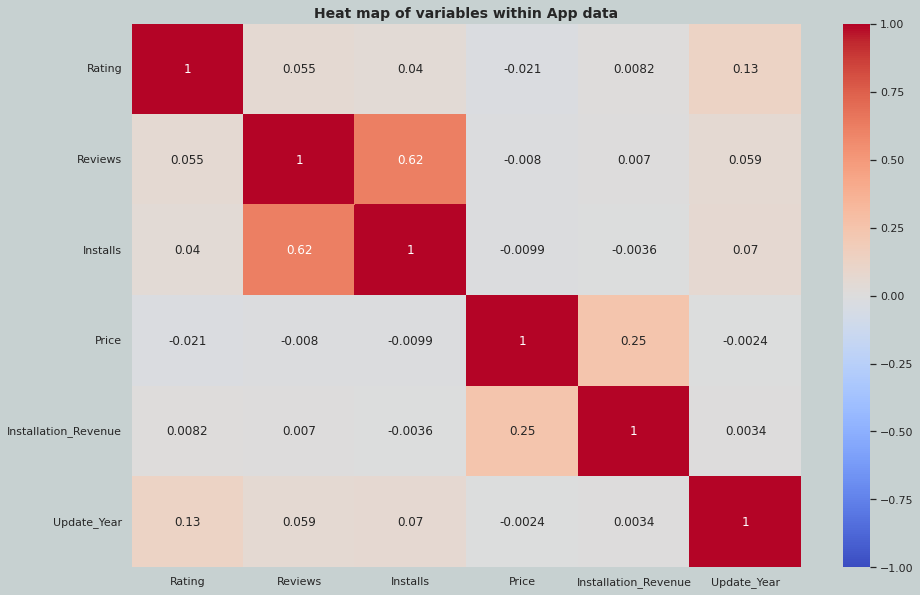

In [ ]:
# Finding corelation between various data in df1
Corr=df1

corr_df = Corr.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_df,vmin=-1, cmap='coolwarm', annot=True)

plt.title('Heat map of variables within App data', fontsize=14, weight='bold')

#### 2. Refined data corelation and categorical analysis of App data only.

In this part of visualization I have converted or excluded string data from 'Size' and 'Android ver2' to get there numerical data and visualise there part as correlation with other variables too. Here I have just excluded data from columns that was not supporting to get correlation data for that column. Note that I haven't applied standerdization proceeder on thease columns by filling mean or median data as it would not be appropreate and would lead us to wrong conclusion.

In [ ]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Android Ver2', 'Prime_Genres', 'Installation_Revenue',
       'Review Category', 'Size Category', 'Rating Category', 'Update_Month',
       'Update_Year'],
      dtype='object')

In [ ]:
df1['Size'].unique()

array([20.0, 0.055, 9.2, 4.2, 8.2, 38.0, 10.0, 31.0, 35.0, 5.6, 40.0,
       43.0, 15.0, 52.0, 13.0, 'Varies with device', 1.2, 9.4, 49.0, 2.4,
       4.7, 25.0, 1.4, 46.0, 8.8, 0.154, 0.655, 96.0, 28.0, 18.0, 5.9,
       2.7, 37.0, 1.6, 11.0, 4.8, 17.0, 3.2, 0.775, 27.0, 60.0, 2.3, 4.3,
       24.0, 2.5, 23.0, 3.8, 74.0, 3.7, 9.3, 3.1, 3.9, 1.5, 68.0, 12.0,
       0.683, 4.0, 94.0, 1.7, 1.3, 33.0, 22.0, 63.0, 0.169, 7.5, 50.0,
       14.0, 2.8, 4.1, 5.0, 8.1, 6.3, 5.5, 2.6, 4.6, 4.4, 83.0, 53.0,
       29.0, 0.5, 7.4, 5.8, 1.8, 7.1, 73.0, 26.0, 6.1, 5.4, 7.8, 2.0, 7.9,
       3.0, 6.2, 6.6, 64.0, 2.1, 70.0, 30.0, 3.6, 8.3, 19.0, 2.9, 59.0,
       8.7, 69.0, 3.4, 2.2, 16.0, 3.3, 61.0, 6.0, 7.2, 3.5, 4.5, 21.0,
       9.1, 8.6, 1.1, 8.4, 5.7, 6.7, 0.861, 66.0, 4.9, 56.0, 0.334, 48.0,
       7.0, 76.0, 67.0, 5.3, 0.516, 7.6, 0.608, 9.6, 8.0, 89.0, 44.0,
       57.0, 6.9, 1.9, 55.0, 5.1, 8.9, 54.0, 1.0, 78.0, 42.0, 9.8, 39.0,
       87.0, 86.0, 5.2, 62.0, 6.8, 7.7, 0.619, 9.7, 6.4, 6.5, 8

In [ ]:
# Size and Android Version can be converted into numeric if there string values are excluded
dff1=df1[df1['Android Ver2']!='Varies with device']
dff1=dff1[dff1['Size']!='Varies with device']

In [ ]:
dff1[['Size', 'Android Ver2']] = dff1[['Size', 'Android Ver2']].apply(pd.to_numeric)

In [ ]:
dff1['Android Ver2'].unique()

array([4., 2., 1., 3., 5., 8., 7., 6.])

Text(0.5, 1.0, "Heat map of variables within App data\n(Excluding 'Varies with devices' cases)")

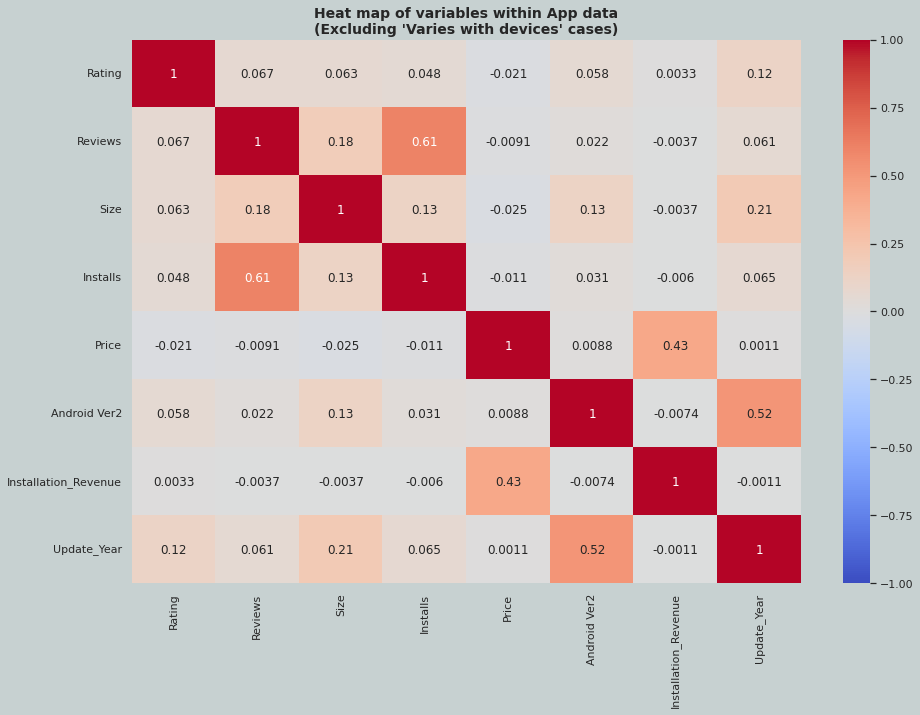

In [ ]:
Corr=dff1

corr_df = Corr.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_df,vmin=-1, cmap='coolwarm', annot=True)

plt.title("Heat map of variables within App data\n(Excluding 'Varies with devices' cases)", fontsize=14, weight='bold')

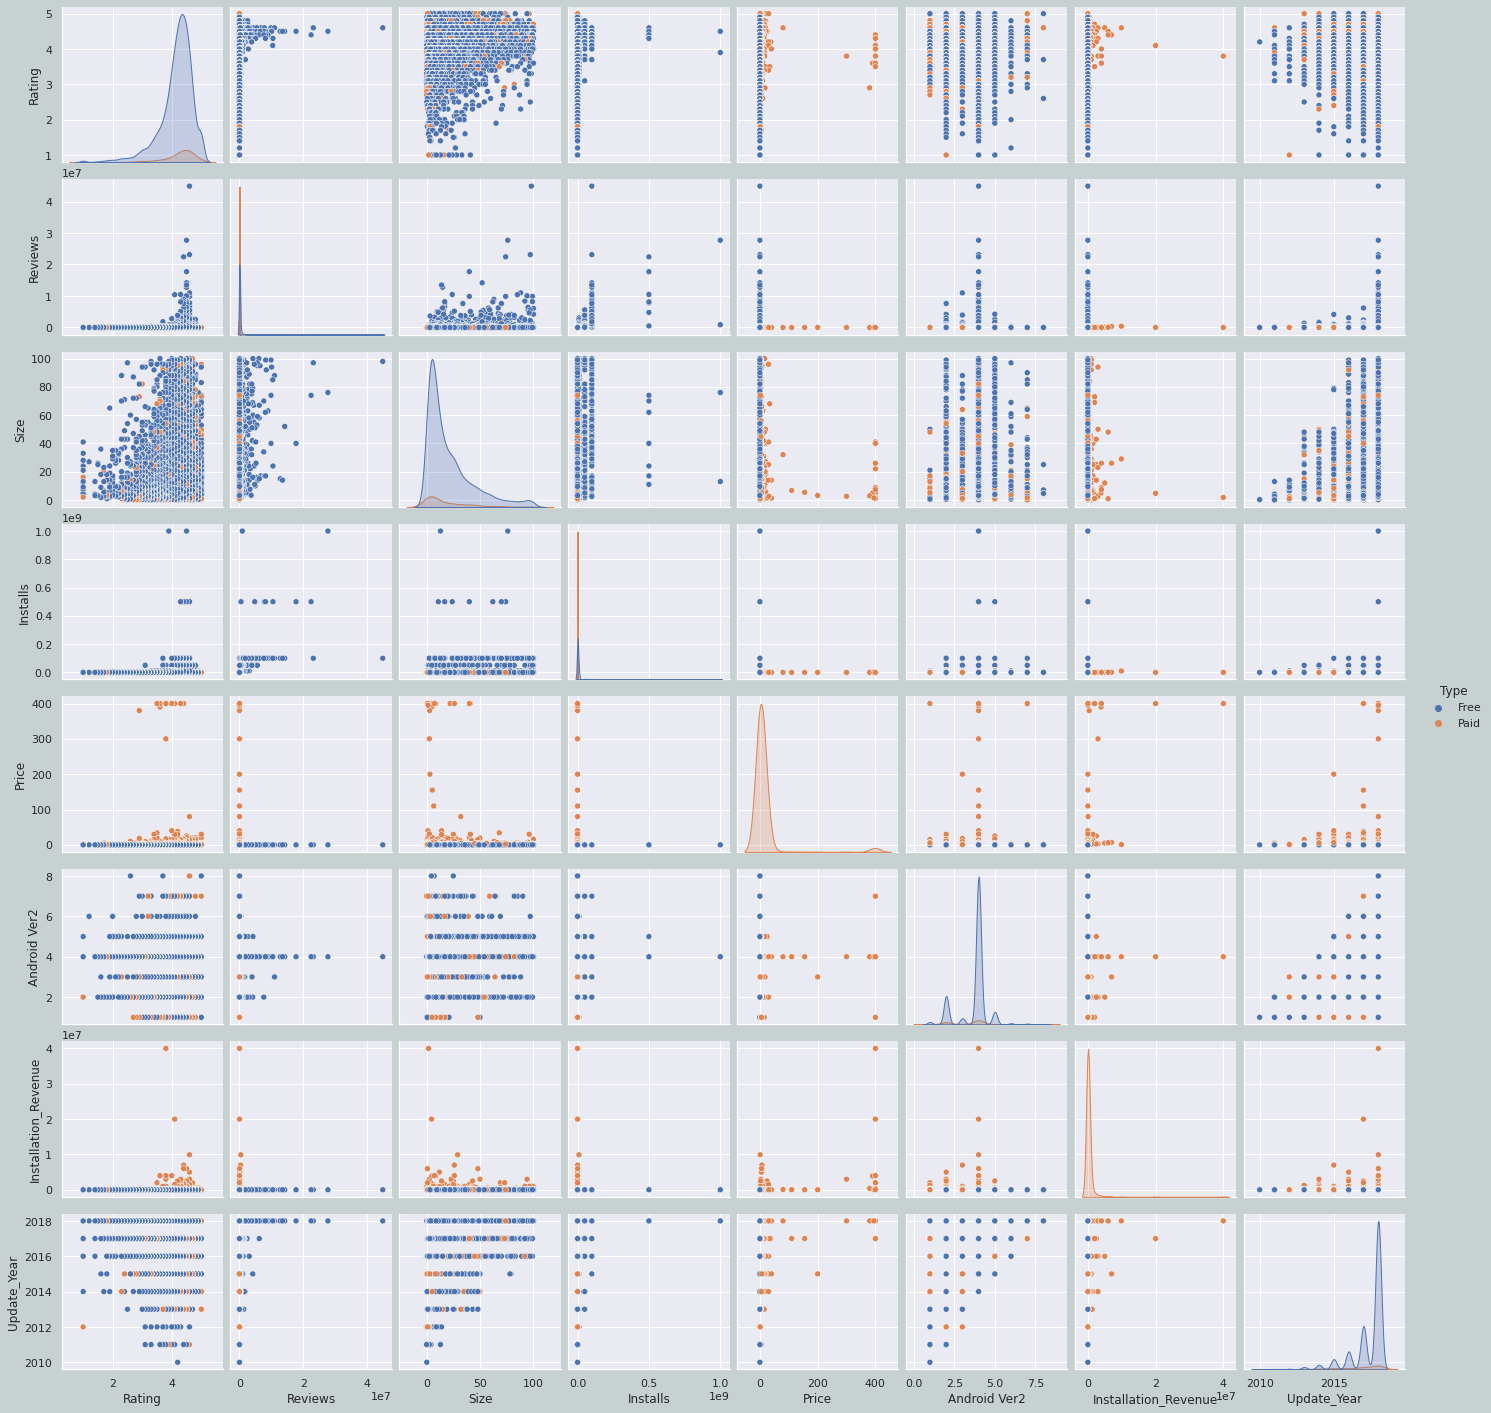

In [ ]:
# Categorical analysis
sns.pairplot(dff1, hue="Type")

#### 3. Checking correlation and categorical data trend with Review data frame combined with App data.

As treated in above case, here too I have done same thing and excluded string data of Size and Android Ver2 column from data, and letter analysed it for correlation. Note that I would not be considering this results as conclusive as this results will be more biased towards app that have more number of reviews. Generalised trend may hide if distribution of number of reviws within app is highly uneven.

In [ ]:
# Applying thease details for Review data too
dff2=df3[df3['Android Ver2']!='Varies with device']
dff2=dff2[dff2['Size']!='Varies with device']

In [ ]:
dff2[['Size', 'Android Ver2']] = dff2[['Size', 'Android Ver2']].apply(pd.to_numeric)

Text(0.5, 1.0, "Heat map of variables within App Review data and App data combined\n(Excluding 'Varies with devices' cases)")

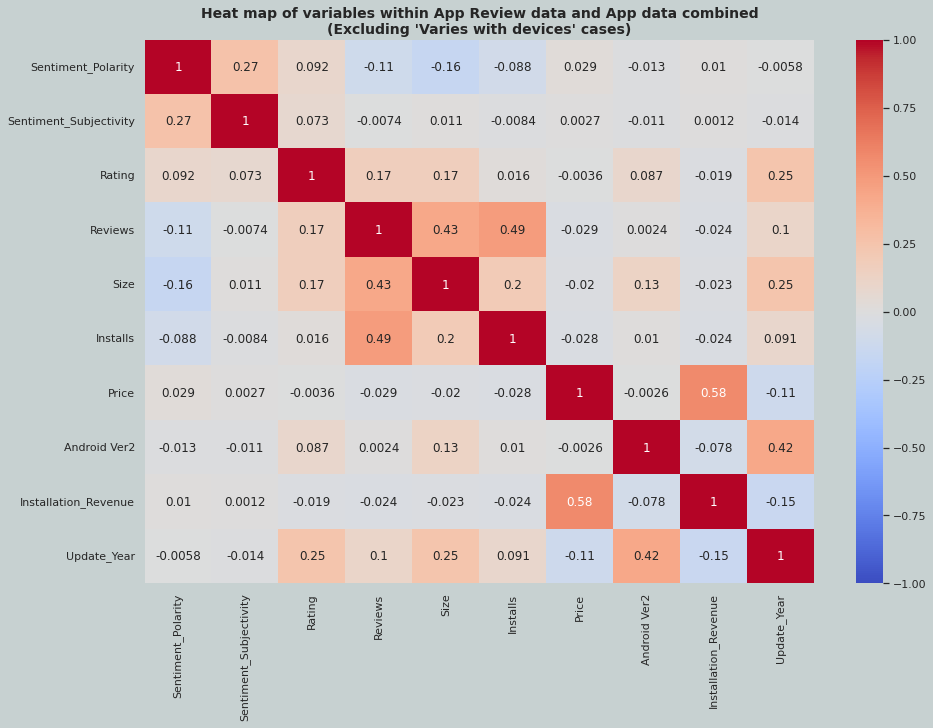

In [ ]:
Corr=dff2

corr_df = Corr.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_df,vmin=-1, cmap='coolwarm', annot=True)

plt.title("Heat map of variables within App Review data and App data combined\n(Excluding 'Varies with devices' cases)", fontsize=14, weight='bold')

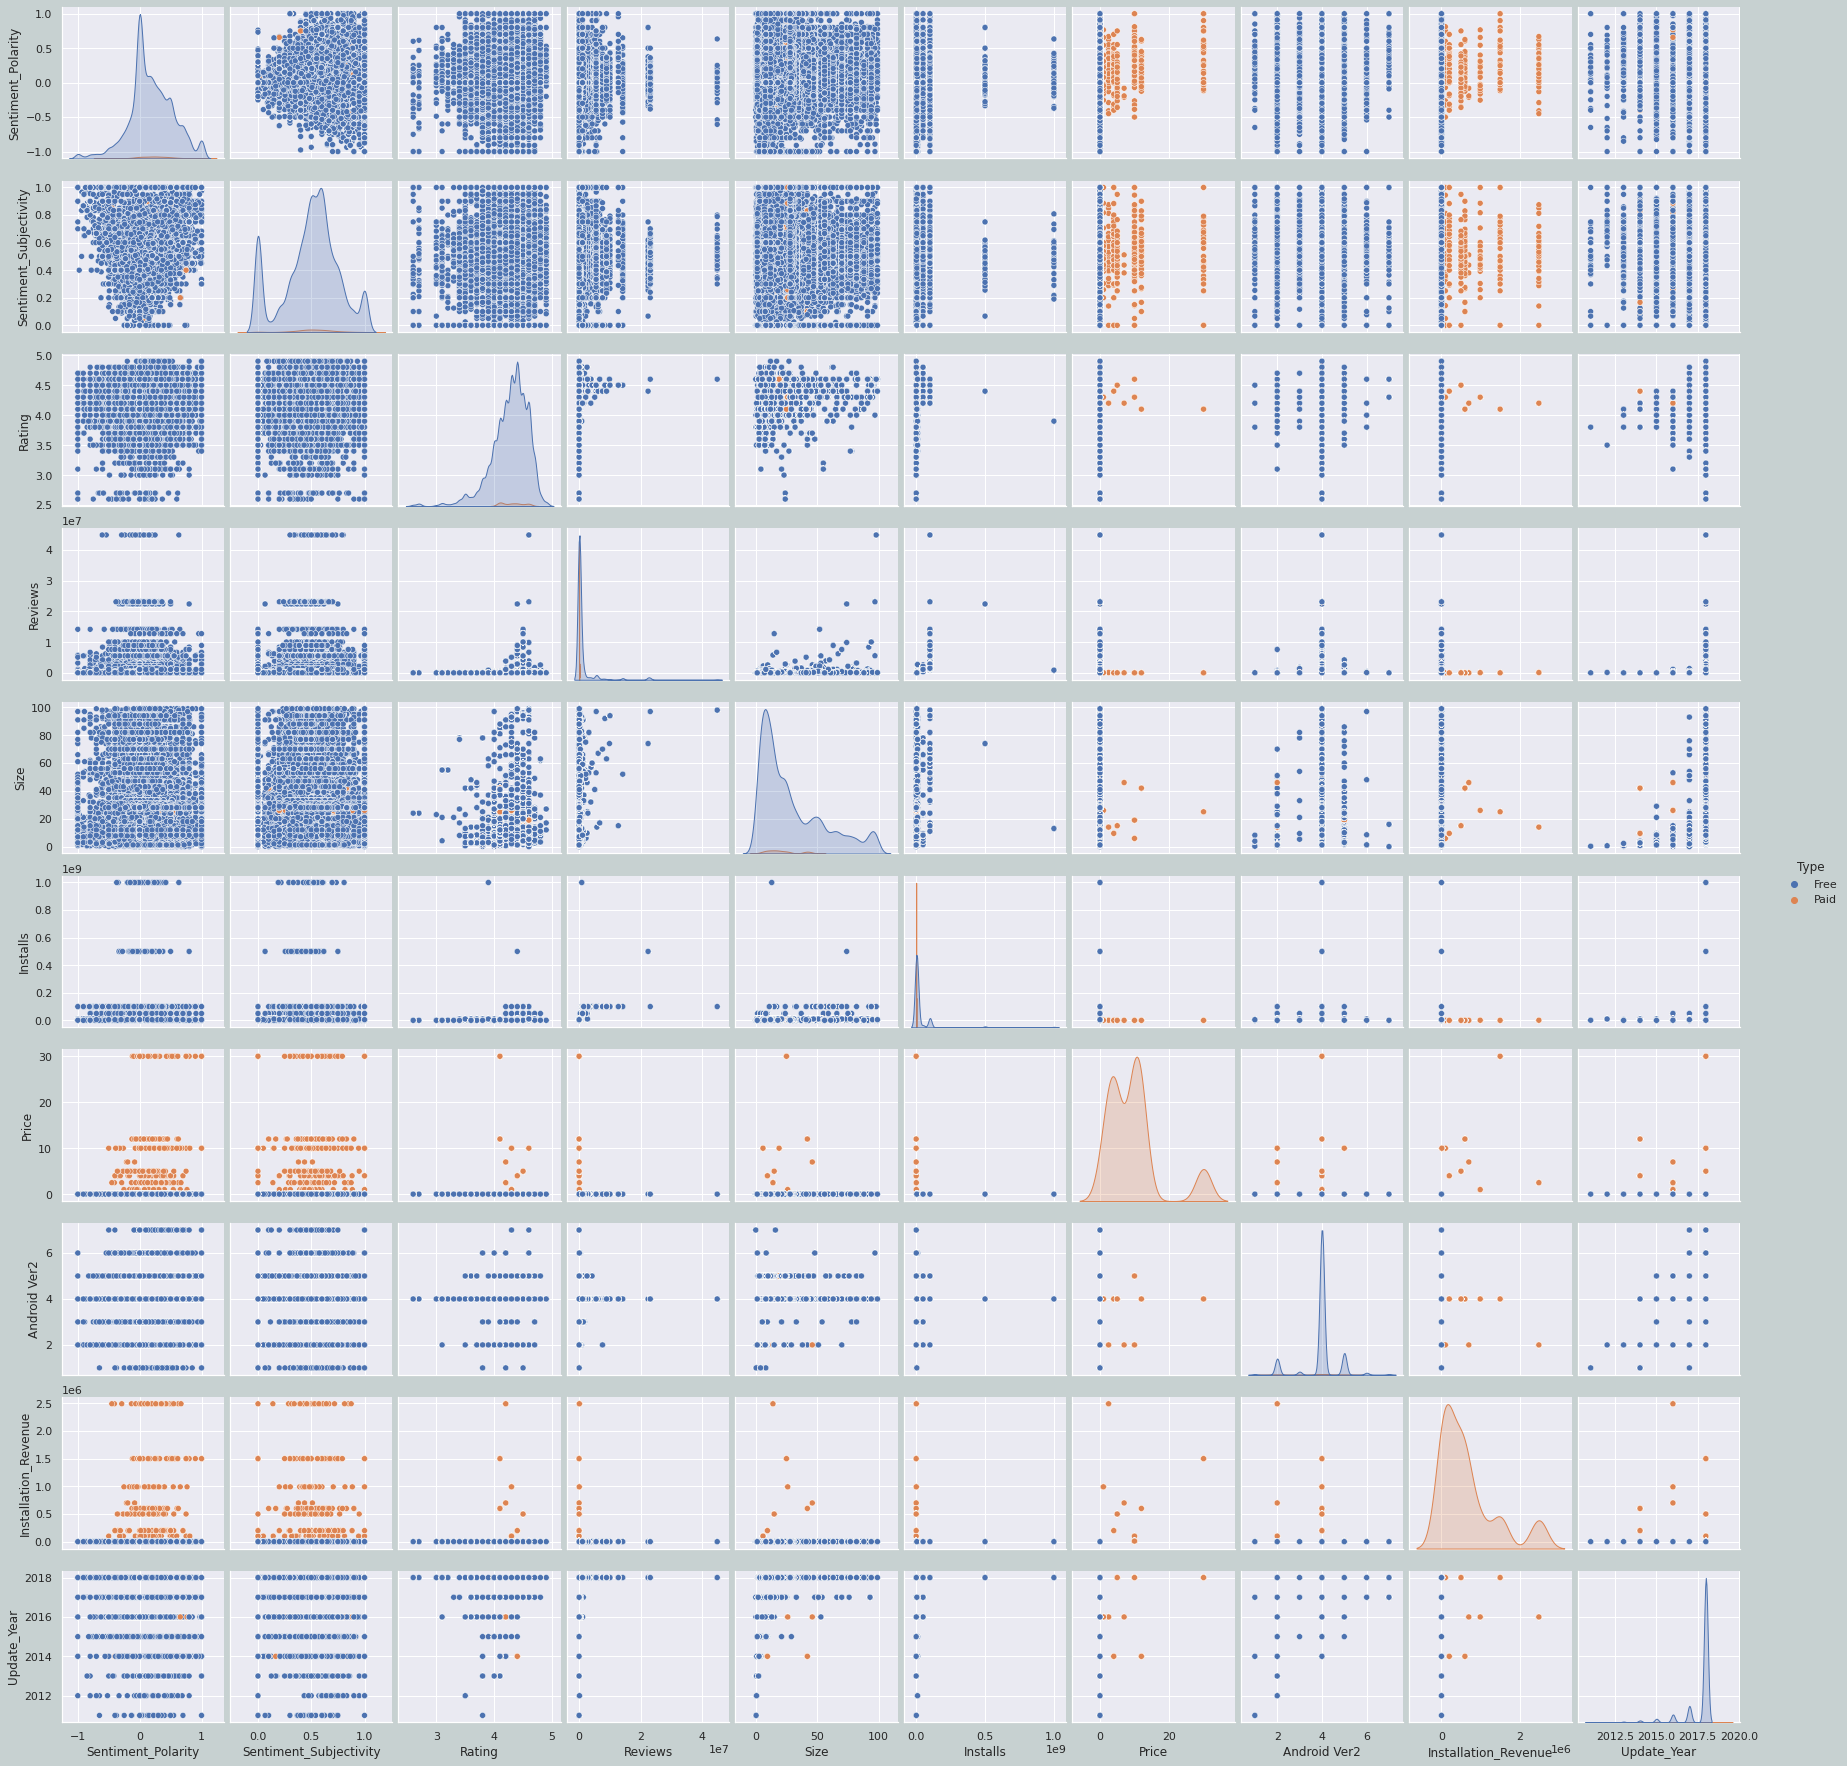

In [ ]:
# Categorical analysis
sns.pairplot(dff2, hue="Type")

We note that allthough analysis above has given us bigger picture about how data 
is linked with each other. We still need to mine in to extract detais about how 
variables are dependent.
We Now have below finalised dataframe to be analysed
1. df1 as details of all unique App
2. df3 as details of review with App details merged on it

### App Data Analysis

#### 1. Visualising distribution of rating on various app category

I have used box plot to visualise the distribution of rating over each category. I have also manupulated oreder of category on the plot such that the one with heighest average rating appeares first followed by 2nd best average and so on.

From visualisation we can conclude that:
1. Mostly all category have recieved rating between 4 and 5 and rating below 3 stands to be outlier in most cases of app.
2. Event is the category with heighest average rating for its app followed by Art_and_Design and Education.
3. Dating is the worst performing category.
4. As the average rating drops for the category, we can see span of rating for that category also increases.  

Text(0.5, 1.0, 'Distribution of Rating Vs App Category')

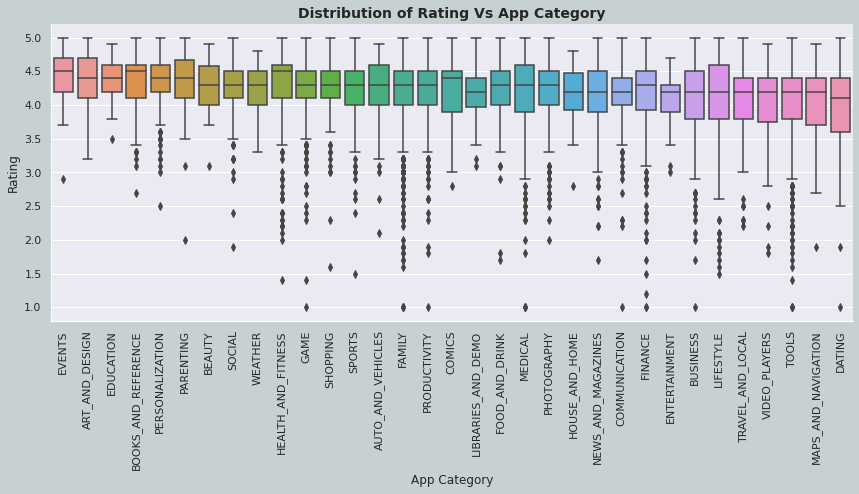

In [ ]:
# Rating Vs Category
# Let us first chek on category for rating beein given to them

#Find list of Category based on order of average rating
Cat_Vs_Rating=df1.groupby(['Category'], as_index=False).agg({'Rating':'mean'})
Cat_Vs_Rating.sort_values('Rating',ascending=False,inplace=True)
Cat_Order=list(Cat_Vs_Rating['Category'])

#Ploting
ax=sns.catplot(data=df1, x="Category", y="Rating", kind="box", order=Cat_Order, height=5, aspect=2.5)  #For controlling higher level API figsize will not work.
ax.set_xticklabels(rotation=90)

#Labeling
plt.xlabel('App Category')
plt.title('Distribution of Rating Vs App Category', fontsize=14, weight='bold')


#### 2. Statistical analysis of Rating distribution

From categorical plot we already understand that for most cases or apps review was given between 4 and 5. Lets check this out how overall rating is distributed.

Conclusion.
1. From graph we can see that criteria of final rating of app folows normal distribution curve.
2. Mean rating after considering all case is 4.17 and median rating is 4.3.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Rating within Apps')

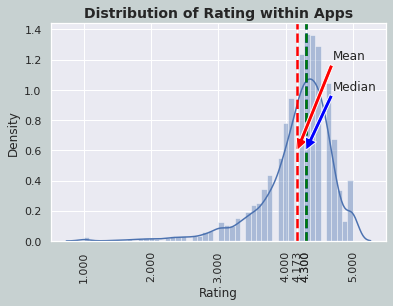

In [ ]:
# Cheking if rating is normally distributed

Rating=df1[~df1['Rating'].isna()]['Rating']
ax=sns.distplot(Rating, hist=True)
plt.axvline(x=Rating.median(),color='blue',ls='--', lw=2.5)
plt.axvline(x=Rating.mean(),color='red',ls='--', lw=2.5)
plt.axvline(x=float(Rating.mode()),color='green',ls='--', lw=2.5)
plt.xticks([1,2,3,4,5,Rating.mean(),float(Rating.mode()),Rating.median()], rotation=90)
ax.annotate('Mean', xy=(Rating.mean(),0.6), xytext=(4.7,1.2), 
                  arrowprops=dict(facecolor='red', shrink=1))
ax.annotate('Median', xy=(Rating.median(),0.6), xytext=(4.7,1.0), 
                  arrowprops=dict(facecolor='blue', shrink=1))

#Labeling
plt.title('Distribution of Rating within Apps', fontsize=14, weight='bold')

#### 3. Visualising distribution of rating on Numbe of Installs done


At categori level it is evident that most cases have high rating, this can be influenced by high number of installs hence we should chek if a perticular rating increases based on number of instlls or reviews category or not. I have used same box plot agian to visualise distribution of rating on installs

Result:
1. App with lower number of installs (below 1000) have higher rating but biger span. This shows that there is large level of contrast within users view on such app.
2. App with installs more then 5000 and higher therafter shows slight increase in average rating. Also with higher number of installs Rating span is decreased.

Text(0.5, 1.0, 'Distribution of Rating Vs Number of App installed')

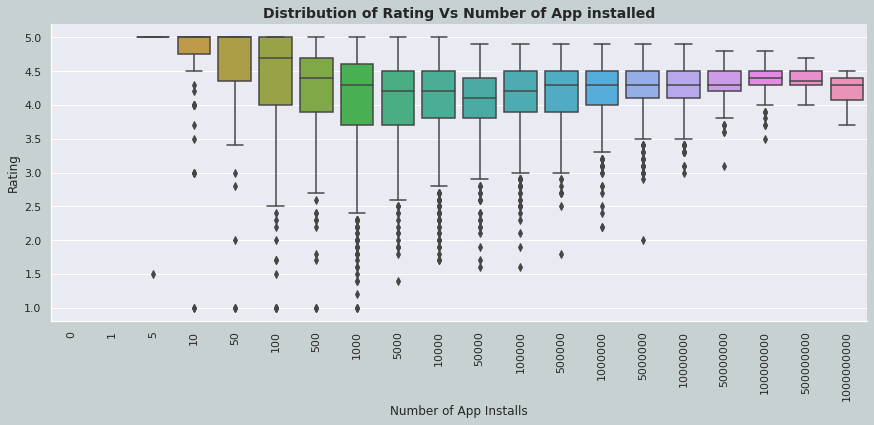

In [ ]:

# Rating Vs Number of installation
ax=sns.catplot(data=df1, x="Installs", y="Rating", kind="box", height=5, aspect=2.5)
ax.set_xticklabels(rotation=90)

#Labeling
plt.xlabel('Number of App Installs')
plt.title('Distribution of Rating Vs Number of App installed', fontsize=14, weight='bold')

#### 4. Visualising distribution of rating on Numbe of Reviews

Some time user may have installed app but would have never reviewed app on playstore, in that case we can say installs will not corelate with rating accuracy. Insted number of reviews can give more accurate connections. Hence I have visulised distribution of rating on number of reviews recieved by app.

Result:
1. App with very low review have rating ranging from 1-5 that is with max span.
2. App that has got heighest reviews are also have better rating.

Text(0.5, 1.0, 'Distribution of Rating Vs Revew category')

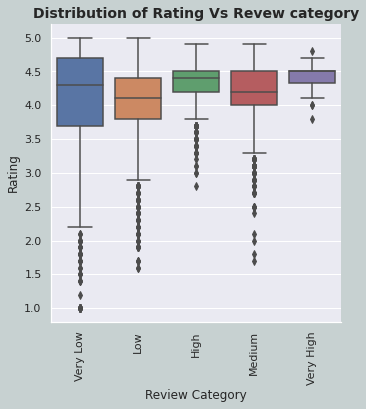

In [ ]:
# Rating Vs Number of installation
ax=sns.catplot(data=df1, x='Review Category', y="Rating", kind="box", height=5, aspect=1)
ax.set_xticklabels(rotation=90)

#Labeling
plt.title('Distribution of Rating Vs Revew category', fontsize=14, weight='bold')

#### 5. Visualising distribution of rating on Year of update

It may be possibel that app with latest update would be performing better and would have recieved more stronger ratings. Best way to check same is to go with box plot of rating on year of update.

Result:
App with latest update have slitely heigher average rating then there previous counterpart. Although span of rating is maximum and this may be attributed to mixed satisfaction recieved by users.

Text(0.5, 1.0, 'Distribution of Rating Vs Year of update')

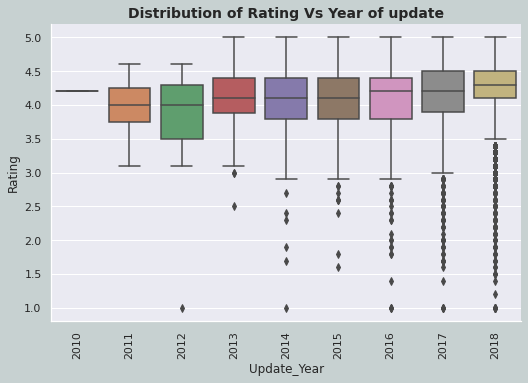

In [ ]:
# Rating Vs Year of update
ax=sns.catplot(data=df1, x='Update_Year', y="Rating", kind="box", height=5, aspect=1.5)
ax.set_xticklabels(rotation=90)

#Labeling
plt.title('Distribution of Rating Vs Year of update', fontsize=14, weight='bold')


#### 6. Visualising distribution of rating on content of app

Cheking distribution of rating on content category of app by using box plot.

Result:
1. Adults only app has the heighest average rating and least span.
2. App belonging to eveyone have heighest span of rating.

Text(0.5, 1.0, 'Distribution of Rating Vs Content category')

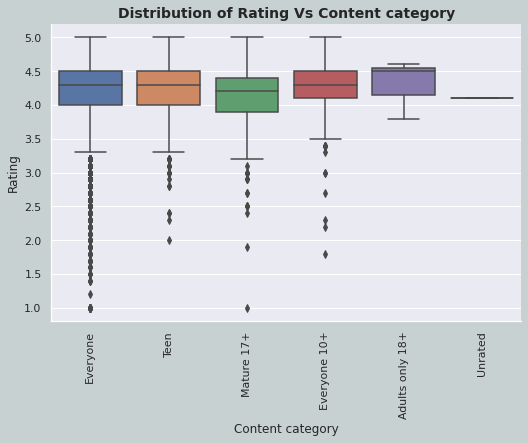

In [ ]:
# Rating Vs Content Type of App
ax=sns.catplot(data=df1, x='Content Rating', y="Rating", kind="box", height=5, aspect=1.5)
ax.set_xticklabels(rotation=90)

#Labeling
plt.xlabel('Content category')
plt.title('Distribution of Rating Vs Content category', fontsize=14, weight='bold')

#### 7. Number of app available in each category and there type

Bar chart of number of app in each category is ploted with there specific type ie. paid or free. 

Result:
1. Category family contains heighest number of app, followed by category Game and Personalisation.
2. Events category have least number of app available follwed by Auto&Vehicles.
3. Most of the apps are free.

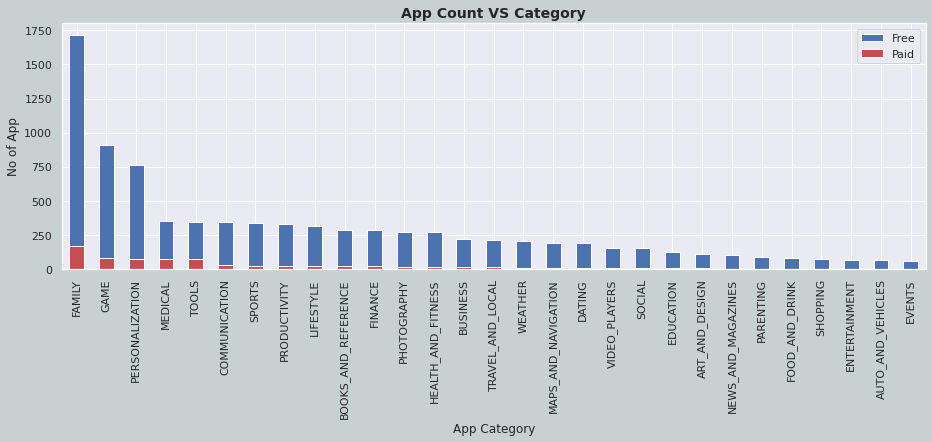

In [ ]:
# No of app in market and its analysis with app being free or paid

# Sum of app count vs category
Cat_Vs_Count=df1.groupby(['Category'], as_index=False).agg({'App':'count'})
Cat_Vs_Count.sort_values('App',ascending=False,inplace=True)

final_df2=df1[df1['Type']=='Paid']
Cat_Vs_Count2=final_df2.groupby(['Category'], as_index=False).agg({'App':'count'})
Cat_Vs_Count2.sort_values('App',ascending=False,inplace=True)

# Fixing subplot frames
ax1 = plt.subplot2grid(shape=(3, 2), loc=(0, 0), colspan=2)

# Adjusting subplot windows
plt.subplots_adjust(left=0.00,
                    bottom=0.00,
                    right=1,
                    top=1,
                    wspace=.1,
                    hspace=.7)

#Plotting
Cat_Vs_Count.plot.bar(x='Category', y='App', rot=90, ax=ax1, figsize=(12,15))
Cat_Vs_Count2.plot.bar(x='Category', y='App', rot=90, ax=ax1, color='r')

#Labeling
ax1.set_ylabel('No of App')
ax1.set_xlabel('App Category')
ax1.set_title('App Count VS Category', fontsize=14, weight='bold')
ax1.legend(['Free', 'Paid'])

#### 8. Pie chart showing all categories and %of total app available in there subacategory.

Insted of analysisng number of app on each category I have ploted a pie chart for each categorical variable and mentioned distribution of number of app within each sub category.

Result:
1. 92.3% of the app is free.
2. 81.2% of the app is available for everyone.
3. Only 1.3% of the app has got heighest reviews.
4. Most of the app are of medium sized.
5. 66.4% of the app are latest updated (ie 2018)
6. Most app can run on Android version 4.0 and above.


Text(0.5, 0.98, 'Number of App distributed in each category')

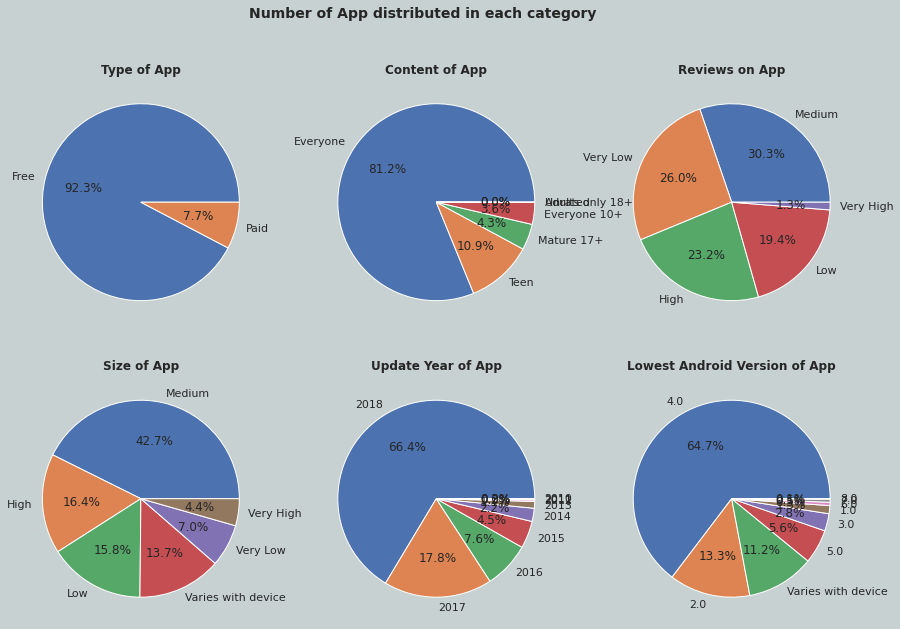

In [ ]:
# Count of app in all other category
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%'.format(pct)
        return my_format

plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(2, 3), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2))
ax4 = plt.subplot2grid(shape=(2, 3), loc=(1, 0))
ax5 = plt.subplot2grid(shape=(2, 3), loc=(1, 1))
ax6 = plt.subplot2grid(shape=(2, 3), loc=(1, 2))

#Ploting App_count Vs Type
s = df1['Type'].value_counts()
ax1.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = df1['Content Rating'].value_counts()
ax2.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = df1['Review Category'].value_counts()
ax3.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = df1['Size Category'].value_counts()
ax4.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = df1['Update_Year'].value_counts()
ax5.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = df1['Android Ver2'].value_counts()
ax6.pie(s,labels = s.index, autopct=autopct_format(s))


#Labeling
ax1.set_title('Type of App', fontsize=12, weight='bold')
ax2.set_title('Content of App', fontsize=12, weight='bold')
ax3.set_title('Reviews on App', fontsize=12, weight='bold')
ax4.set_title('Size of App', fontsize=12, weight='bold')
ax5.set_title('Update Year of App', fontsize=12, weight='bold')
ax6.set_title('Lowest Android Version of App', fontsize=12, weight='bold')

plt.suptitle('Number of App distributed in each category', fontsize=14, weight='bold')

#### 9. Most number of Installation seen on category

Installation is driven by the requirements of the audiance. We have seen that family is the most offered category, but what is most seeked is one that is most installed by user.

Result:
1. Game is the most instlled category followed by Family.
2. Events is the least installed category.
3. Contribution of paid app in total installation is nigligible.

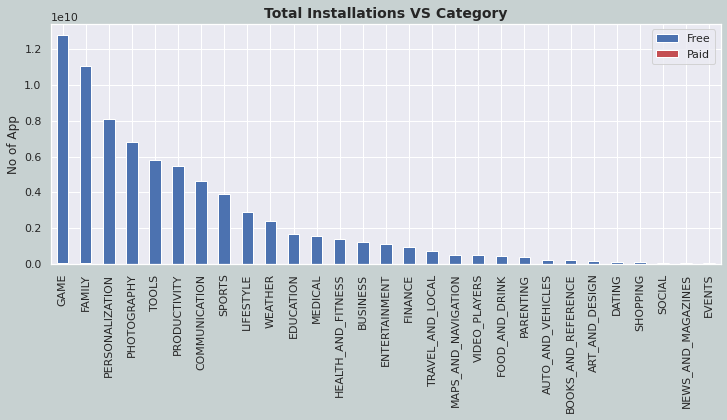

In [ ]:
# App Category with heighest number of installations
# Sum of Installation vs category
Cat_Vs_Count=df1.groupby(['Category'], as_index=False).agg({'Installs':'sum'})
Cat_Vs_Count.sort_values('Installs',ascending=False,inplace=True)

final_df2=df1[df1['Type']=='Paid']
Cat_Vs_Count2=final_df2.groupby(['Category'], as_index=False).agg({'Installs':'sum'})
Cat_Vs_Count2.sort_values('Installs',ascending=False,inplace=True)

# Fixing subplot frames
ax1 = plt.subplot2grid(shape=(3, 2), loc=(0, 0), colspan=2)

#Plotting
Cat_Vs_Count.plot.bar(x='Category', y='Installs', rot=90, ax=ax1, figsize=(12,15))
Cat_Vs_Count2.plot.bar(x='Category', y='Installs', rot=90, ax=ax1, color='r')
ax1.set_ylabel('No of App')
ax1.set_xlabel('')
ax1.set_title('Total Installations VS Category', fontsize=14, weight='bold')
ax1.legend(['Free', 'Paid'])


#### 10. Average rating vs type in each category.

From graph we conclude that most (around 60%) of the paid app in the category is heigher in rating then its free counter parts. Although average is biased towards free app rating this can be mainly attributed towards large number of users of free apps insted of paid apps.

Text(0.5, 1.0, 'Average Rating Vs Category')

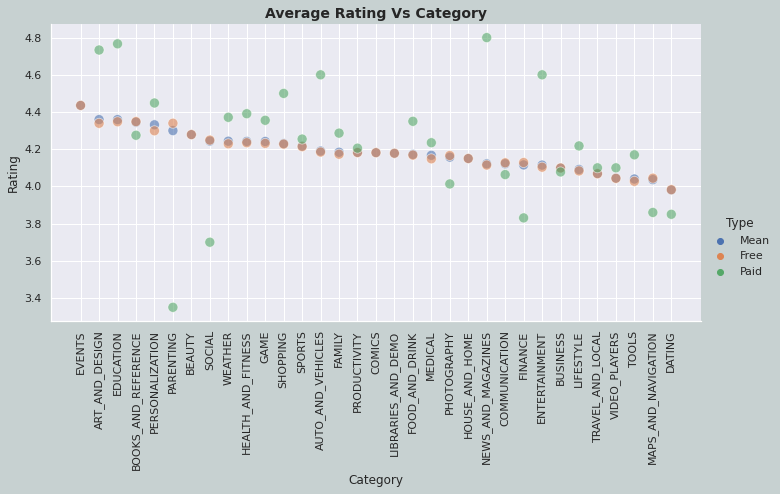

In [ ]:
# Visualising average rating vs type in each category

Cat_Vs_Rating1=df1.groupby(['Category'], as_index=False).agg({'Rating':'mean'})
Cat_Vs_Rating1.sort_values('Rating',ascending=False,inplace=True)
Cat_Vs_Rating1['Type']="Mean"
Cat_Vs_Rating2=df1.groupby(['Category', 'Type'], as_index=False).agg({'Rating':'mean'})

Cat_Vs_Rating=pd.concat([Cat_Vs_Rating1,Cat_Vs_Rating2], axis=0)

sns.relplot(
    data=Cat_Vs_Rating,
    x="Category", y="Rating", hue="Type", alpha=0.6, height=5, aspect=2, s=100)
plt.xticks(rotation=90)

#Labeling
plt.title('Average Rating Vs Category', fontsize=14, weight='bold')

#### 11. Top 20 installed apps

List shows top 20 installed apps. Exact number of installation is not available all the app that is installed above 1billion times fall in this category.

Text(0.5, 0, 'Installs in billion')

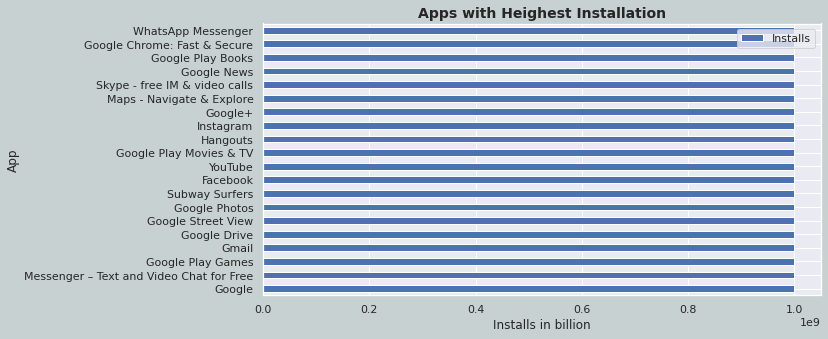

In [ ]:
# Top Installed Apps
Top_Installed_App=df1.sort_values('Installs')
Top_Installed_App.tail(20).plot.barh(x='App', y='Installs', figsize=(10,5))

#Labeling
plt.title('Apps with Heighest Installation', fontsize=14, weight='bold')
plt.xlabel('Installs in billion')

#### 12. Top 20 reviewed app

Based on number of reviews bean made on each app I have ploted bar plot of number of reviews vs app name for top 20 reviewed app.

Result:
Facebook is the heighest reviewed app followed by Watsapp and Instagram.

Text(0.5, 0, 'Reviews in 10million')

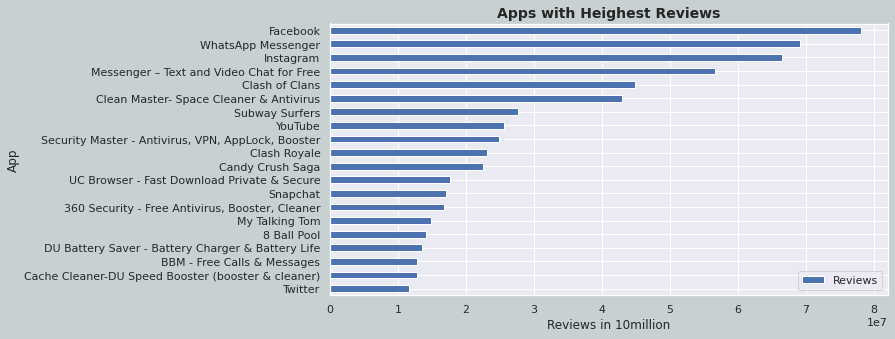

In [ ]:
# Top Reviewed Apps
Top_Reviewed_App=df1.sort_values('Reviews')
Top_Reviewed_App.tail(20).plot.barh(x='App', y='Reviews', figsize=(10,5))

#Labeling
plt.title('Apps with Heighest Reviews', fontsize=14, weight='bold')
plt.xlabel('Reviews in 10million')


#### 13. Top 20 heighest rated app were installation is above 100milion

This is the list of App with most installation and still retaining heighest rating.

In [ ]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Android Ver2', 'Prime_Genres', 'Installation_Revenue',
       'Review Category', 'Size Category', 'Rating Category', 'Update_Month',
       'Update_Year'],
      dtype='object')

Text(0.5, 0, 'Rating')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128214 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128214 missing from current font.
  font.set_text(s, 0, flags=flags)


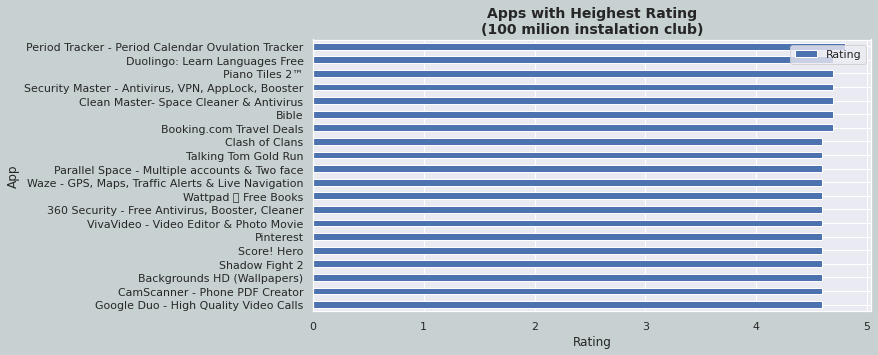

In [ ]:
# Top Rated Apps where Installation is atleast above 100,000,000 (100 milion club toppers)
Top_Rated_App=df1[(~df1['Rating'].isnull()) & (df1['Installs']>=100000000)].sort_values('Rating')
Top_Rated_App.tail(20).plot.barh(x='App', y='Rating', figsize=(10,5))

#Labeling
plt.title('Apps with Heighest Rating\n(100 milion instalation club)', fontsize=14, weight='bold')
plt.xlabel('Rating')

#### 13. Rating of app were installation is above 1billion

Rating of highest installed apps.

Result:
1. Instagram is the most heighest rated app in 1billion installation club followed by Subway surfer and Google Photos.
2. Google play movies & TV have lowest rating in this group.


Text(0.5, 0, 'Rating')

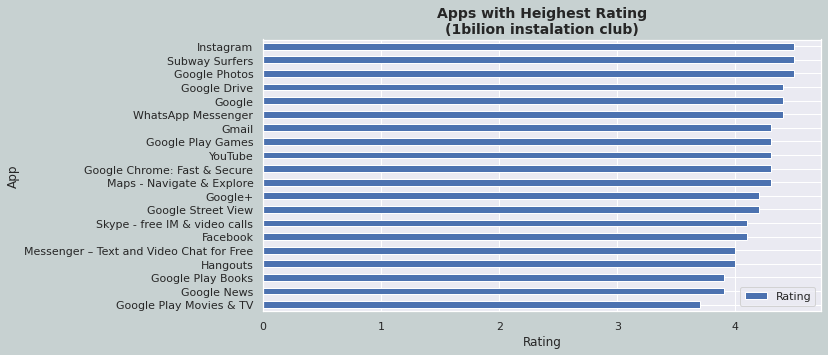

In [ ]:
# Top Rated Apps where Installation is atleast above 1,000,000,000 (1Bilion Club Toppers)
Top_Rated_App=df1[(~df1['Rating'].isnull()) & (df1['Installs']>=1000000000)].sort_values('Rating')
Top_Rated_App.tail(50).plot.barh(x='App', y='Rating', figsize=(10,5))

#Labeling
plt.title('Apps with Heighest Rating\n(1bilion instalation club)', fontsize=14, weight='bold')
plt.xlabel('Rating')

### App Data Analysis (Paid App)

#### 1. Checking correlation of variables within paid app.


Result:
1. Installs are highly correalted to Reviews or vice versa.
2. Installation revenue is also highly correlated to number of installs which is obious.

In [ ]:
# Paid app data frame
Paid_App=df1[df1['Type']=='Paid']

Text(0.5, 1.0, 'Heat map for variables within paid App')

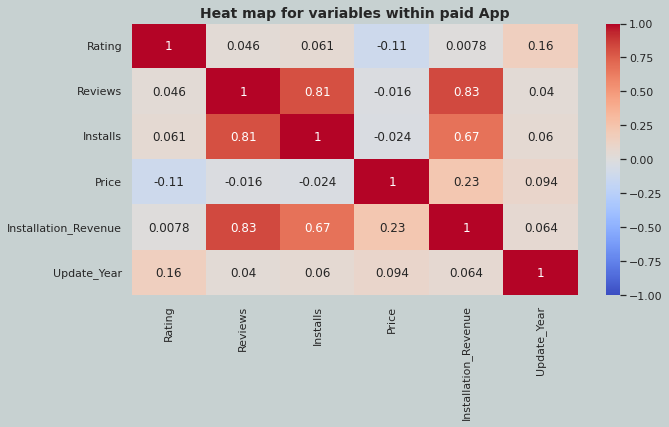

In [ ]:
# Correlation between various paid app variables
corr_df = Paid_App.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_df,vmin=-1, cmap='coolwarm', annot=True)

#Labeling
plt.title('Heat map for variables within paid App', fontsize=14, weight='bold')

#### 2. Distribution of rating on price of app.

I have used joint plot to analyse trend on rating based on price of app.

Result:
From visualisation we get to know that most of the apps are priced between 0-50doller or aroung 400dollers. Also ther is no fixed pattern of rating distribution with increase in price.

Text(0.5, 0.98, 'Distribution of Rating and Price for Paid App')

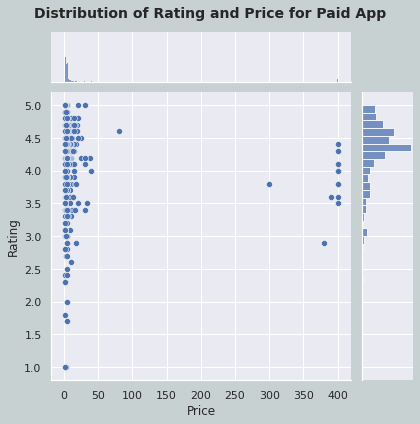

In [ ]:
# Scatter plot of ratinng Vs Price. There will be no direct relation as shown in correlation heatmap, but with joint plot we can picturise there distribution
sns.jointplot(x='Price', y='Rating', data=Paid_App)

#Labeling
plt.subplots_adjust(top=0.92)
plt.suptitle('Distribution of Rating and Price for Paid App', fontsize=14, weight='bold')


In [ ]:
Paid_App['Price'].unique()

array([  0.99,  19.99,   4.99,  29.99,   2.99,   1.99,   3.99,   1.49,
         3.04,   1.75,   6.99,   2.5 ,   9.99,   2.49,  10.  ,   3.49,
         4.49,  14.99,  19.4 ,   3.9 ,   2.59,   5.99,   7.49,  15.99,
        79.99,   5.49,   3.88,  17.99,  18.99,   7.99,   4.29,  12.99,
        14.  ,   2.95,   1.97,   1.  ,  24.99,  11.99,   1.59,   1.76,
       399.99,   1.7 ,  16.99,   3.08,   2.  ,   8.99,  13.99,   1.2 ,
         2.9 ,  37.99,   1.5 ,   1.61,   9.  ,   3.02,   4.84,   1.29,
        39.99,   3.28, 299.99,   3.95,   4.77,   8.49, 389.99,  10.99,
       400.  ,  33.99,   6.49,   2.56,  15.46,   4.6 , 379.99,   4.59,
        25.99, 109.99, 154.99,   1.96,  28.99, 200.  ,  30.99,   3.61,
       394.99,   1.04])

#### 3. Cheking number of apps around price of app as a density function

From joint plot we already have got idea about the price distribution of paid app. I have made same analysis to chek it how price is distributed using distplot.

Result:
Most of the app are concentrated on price of 0 to 10doller, while very few app has price of around 400dollers, rest ther is very nigligibel numbers of apps showing there price other then thease two hot spots.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


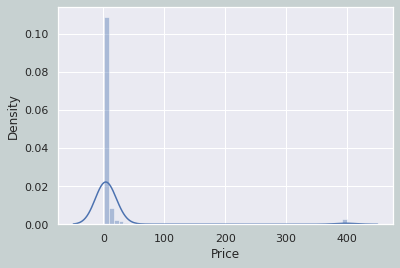

In [ ]:
# Number of app agains price range
Paid_App_Price=Paid_App['Price']
sns.distplot(Paid_App_Price, hist=True

#### 4. Pie chart showing all categories and %of total app available in there subacategory for Paid Apps

Results:
1. 28.6% of app have recieved rating of more then 4.5.
2. 86.1% of the paid apps belongs to content suitable for everyone.
3. 41% of apps have recieved very low reviews.
4. 44.7% of paid apps are updated in 2018.
5. 50% of paid apps are made to run on Android version 4.0 or more.

Text(0.5, 0.98, 'Number of App distributed in each category\n(Paid App)')

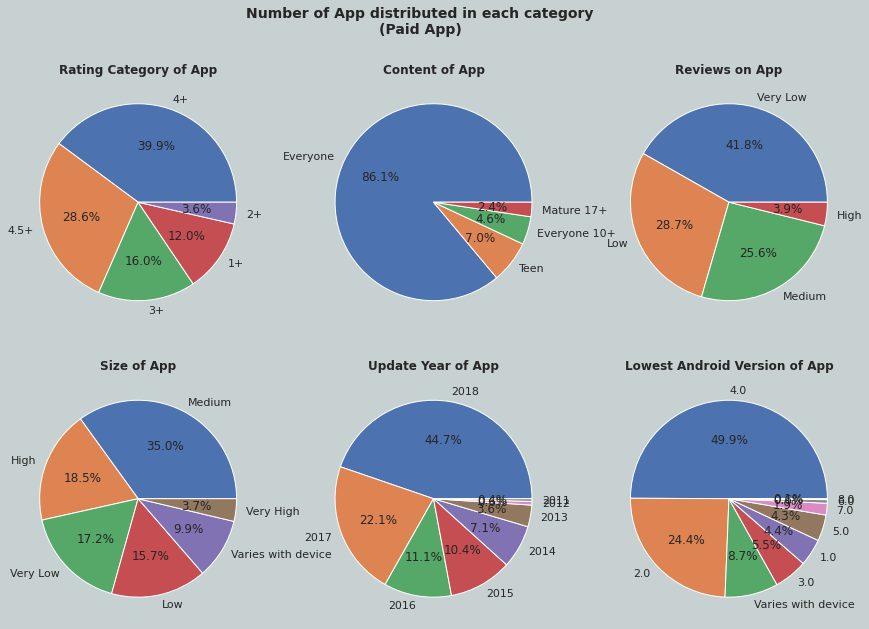

In [ ]:
# Various categorical division of Paid App

plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(2, 3), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2))
ax4 = plt.subplot2grid(shape=(2, 3), loc=(1, 0))
ax5 = plt.subplot2grid(shape=(2, 3), loc=(1, 1))
ax6 = plt.subplot2grid(shape=(2, 3), loc=(1, 2))

#Ploting App_count Vs Type
s = Paid_App['Rating Category'].value_counts()
ax1.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = Paid_App['Content Rating'].value_counts()
ax2.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = Paid_App['Review Category'].value_counts()
ax3.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = Paid_App['Size Category'].value_counts()
ax4.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = Paid_App['Update_Year'].value_counts()
ax5.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = Paid_App['Android Ver2'].value_counts()
ax6.pie(s,labels = s.index, autopct=autopct_format(s))

#Labeling
ax1.set_title('Rating Category of App', fontsize=12, weight='bold')
ax2.set_title('Content of App', fontsize=12, weight='bold')
ax3.set_title('Reviews on App', fontsize=12, weight='bold')
ax4.set_title('Size of App', fontsize=12, weight='bold')
ax5.set_title('Update Year of App', fontsize=12, weight='bold')
ax6.set_title('Lowest Android Version of App', fontsize=12, weight='bold')

plt.suptitle('Number of App distributed in each category\n(Paid App)', fontsize=14, weight='bold')

#### 5. Top category of paid apps by Rating and number of installations.

Result:
1. Game is the category with highest intrest of users in paid app followed by Family. They have the heighest number of total installations.
2. News & Magzines is the category with most sattisfied users as there rating is heighest one.

Text(0, 0.5, 'Installs in 10million')

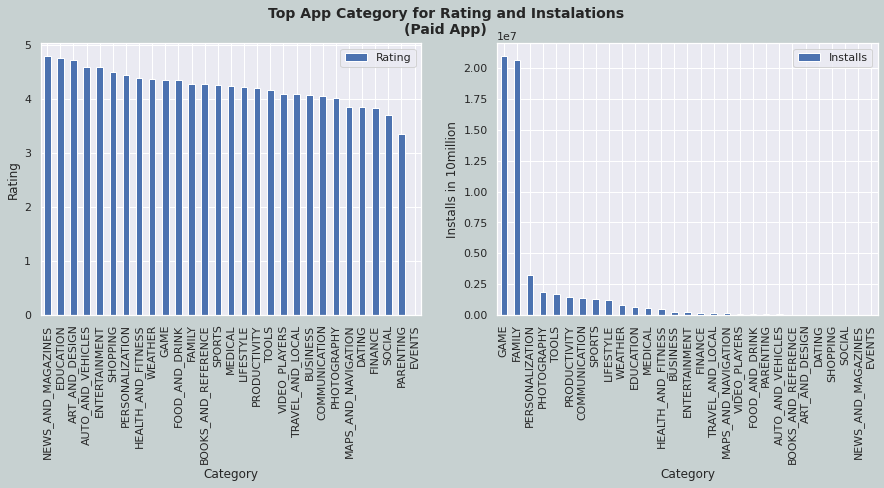

In [ ]:
# Top paid app cattegory with heighest rating and installation

plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid(shape=(1, 2), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 2), loc=(0, 1))

App_Vs_Rating1=Paid_App.groupby(['Category'], as_index=False).agg({'Rating':'mean'})
App_Vs_Rating1.sort_values('Rating',ascending=False,inplace=True)

Cat_Vs_Installation1=Paid_App.groupby(['Category'], as_index=False).agg({'Installs':'sum'})
Cat_Vs_Installation1.sort_values('Installs',ascending=False,inplace=True)

#Plotting
App_Vs_Rating1.plot.bar(x='Category', y='Rating', rot=90, ax=ax1, figsize=(15,5))

Cat_Vs_Installation1.plot.bar(x='Category', y='Installs', rot=90, ax=ax2, figsize=(15,5))

#Labeling
plt.suptitle('Top App Category for Rating and Instalations\n(Paid App)', fontsize=14, weight='bold')
ax1.set_ylabel('Rating')
ax2.set_ylabel('Installs in 10million')


#### 6. Top paid apps by Rating and number of installations.

Result:
1. Hitman sniper and Minecraft are the top paid apps driving intrest of user.
2. Most of the top rated paid apps have recieved rating of 5.

Text(0, 0.5, 'Installs in 10million')

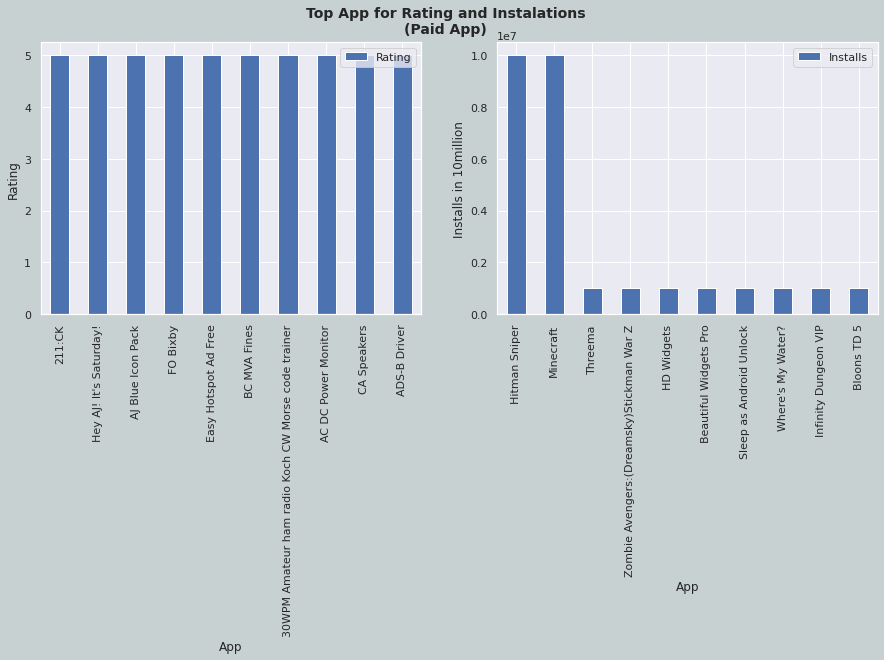

In [ ]:
# Top paid apps with heighest rating an installation
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid(shape=(1, 2), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 2), loc=(0, 1))

App_Vs_Rating1=Paid_App.sort_values('Rating',ascending=False).head(10)

App_Vs_Installation1=Paid_App.sort_values('Installs',ascending=False).head(10)

#Plotting
App_Vs_Rating1.plot.bar(x='App', y='Rating', rot=90, ax=ax1, figsize=(15,5))

App_Vs_Installation1.plot.bar(x='App', y='Installs', rot=90, ax=ax2, figsize=(15,5))

#Labeling
plt.suptitle('Top App for Rating and Instalations\n(Paid App)', fontsize=14, weight='bold')
ax1.set_ylabel('Rating')
ax2.set_ylabel('Installs in 10million')

#### 7. Heighest and lowest priced app

There are number of apps on heighest price and lowest price, so we cant set perticular app as heighest priced or lowest price. Insted app with price of 400$ is the heighest priced app while that lowest price of app is 0.99\$

Text(0, 0.5, 'Price in $')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37666 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25105 missing from current font.
  font.set

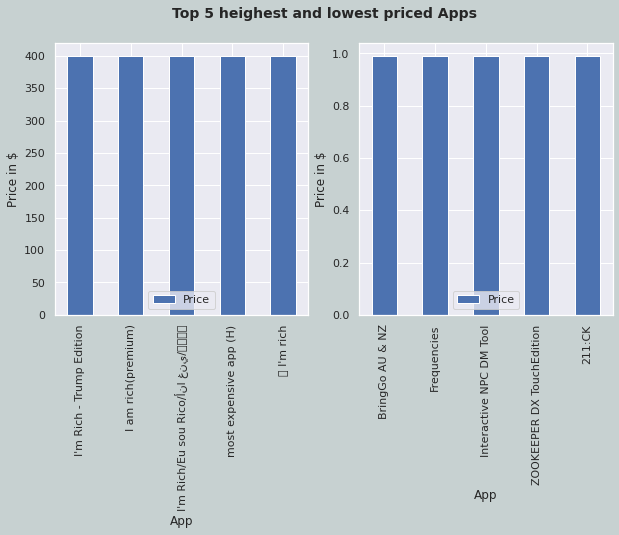

In [ ]:
# Top5 Heighest priced App and Lowest priced app
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid(shape=(1, 2), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 2), loc=(0, 1))

Top_HP_App=Paid_App.sort_values('Price',ascending=False)

#Plotting
Top_HP_App.head(5).plot.bar(x='App', y='Price', rot=90, ax=ax1, figsize=(10,5))

Top_HP_App.tail(5).plot.bar(x='App', y='Price', rot=90, ax=ax2, figsize=(10,5))

#Labeling
plt.suptitle('Top 5 heighest and lowest priced Apps', fontsize=14, weight='bold')
ax1.set_ylabel('Price in $')
ax2.set_ylabel('Price in $')

#### 8. Revenue from installations of top 20 paid apps

Result:
1. Minecraft is the app which have generated heighest ravenue from installations, followed by I am rich and I am rich premium.

Text(0.5, 0, 'Revenue in 10million $')

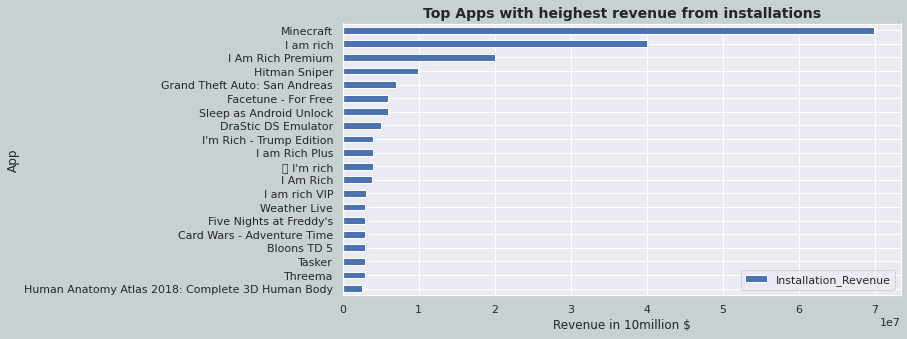

In [ ]:
# Top Apps with highest revenue based on installation (As it is not necessory that app with heighest price will yield highest revenue)
Revenue=Paid_App.sort_values('Installation_Revenue')
Revenue.tail(20).plot.barh(x='App', y='Installation_Revenue', figsize=(10,5))

#Labeling
plt.title('Revenue from Installations', fontsize=14, weight='bold')
plt.xlabel('Revenue in 10million $')

### App Review Analysis

#### 1. Distribution of Sentiment subjectivity Vs Polarity

Result:
1. Sentiment_Polarity have captured Sentiment properly based on content being positive, negative or neutral.
2. Ther is no clear relation between subjectivity and polarity, but as a grey conclusion we can say, as subjectivity of comment decreases, polarity is concentrated towards neutral. Again this statement is very grey and do not hold good for all cases.

In [ ]:
df3.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Android Ver2', 'Prime_Genres',
       'Installation_Revenue', 'Review Category', 'Size Category',
       'Rating Category', 'Update_Month', 'Update_Year'],
      dtype='object')

Text(0.5, 1.0, 'Sentiment Subjectivity Vs Polarity')

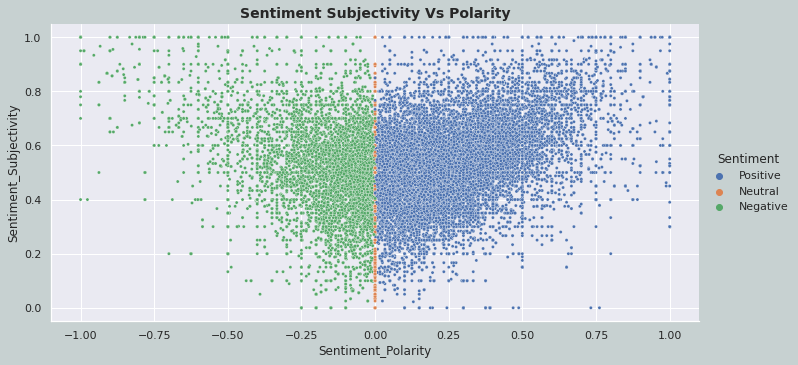

In [ ]:
# Cheking relationship between Sentiment, Sentiment_Polarity and Subjectivity by using scatter plot
# From corelation we have seen that Sentiment is not corelated with any other variables
sns.relplot(
    data=df3,
    x='Sentiment_Polarity', y='Sentiment_Subjectivity', hue='Sentiment', height=5, aspect=2, s=10)

#Labeling
plt.title('Sentiment Subjectivity Vs Polarity', fontsize=14, weight='bold')

#### 2. Checking number of commented reviews and its distribution in each category

Result:
1. Most number of commeted reviws were recieved on app belonging to everyone, while adult apps has recieved least number of commented reviews.
2. Most number of comments were given on apps that have rating more then 4.
3. Most number of comments were given on app that was update in July or in 2018.

Text(0.5, 0, 'Lowest Android Version')

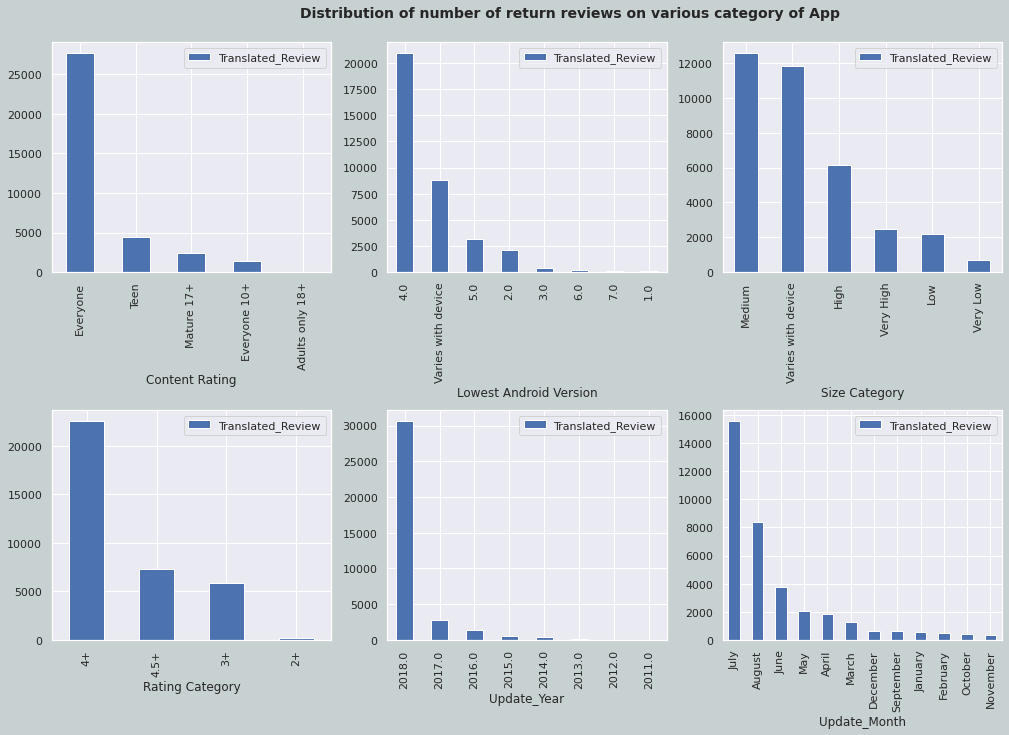

In [ ]:

plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(2, 3), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2))
ax4 = plt.subplot2grid(shape=(2, 3), loc=(1, 0))
ax5 = plt.subplot2grid(shape=(2, 3), loc=(1, 1))
ax6 = plt.subplot2grid(shape=(2, 3), loc=(1, 2))

#Ploting App_count Vs Type

s=df3.groupby(['Content Rating'], as_index=False).agg({'Translated_Review':'count'}).sort_values('Translated_Review',ascending=False)
s.plot.bar(x='Content Rating', y='Translated_Review', ax=ax1)

s=df3.groupby(['Android Ver2'], as_index=False).agg({'Translated_Review':'count'}).sort_values('Translated_Review',ascending=False)
s.plot.bar(x='Android Ver2', y='Translated_Review', ax=ax2)

s=df3.groupby(['Size Category'], as_index=False).agg({'Translated_Review':'count'}).sort_values('Translated_Review',ascending=False)
s.plot.bar(x='Size Category', y='Translated_Review', ax=ax3)

s=df3.groupby(['Rating Category'], as_index=False).agg({'Translated_Review':'count'}).sort_values('Translated_Review',ascending=False)
s.plot.bar(x='Rating Category', y='Translated_Review', ax=ax4)

s=df3.groupby(['Update_Year'], as_index=False).agg({'Translated_Review':'count'}).sort_values('Translated_Review',ascending=False)
s.plot.bar(x='Update_Year', y='Translated_Review', ax=ax5)

s=df3.groupby(['Update_Month'], as_index=False).agg({'Translated_Review':'count'}).sort_values('Translated_Review',ascending=False)
s.plot.bar(x='Update_Month', y='Translated_Review', ax=ax6)

# To adjust subplot properties
plt.subplots_adjust(left=0.02,
                    bottom=0.1,
                    right=0.9,
                    top=0.93,
                    wspace=.2,
                    hspace=.6)

#Labeling
plt.suptitle('Distribution of number of return reviews on various category of App', fontsize=14, weight='bold')
ax2.set_xlabel('Lowest Android Version')

#### 3. Commented review count vs number of app updated vs average rating of app by year on year.

It is evident from above analysis that number of reviews has increased year by year. By ploting trend of number of app, there average rating and number of reviws mad by year on year we get below importen results.
Result:
1. Number of apps geting updated in each year has increased sharply.
2. Number of commented reviews has increase parabolicly by year on year. And sharpest increase was noticed in year 2018.
3. Average rating is lowest in app updated in year 2012, while average rating has shown improved trend from last 2years, and stands heighest in apps that were updated on 2018.

Text(0, 0.5, 'Number of counts')

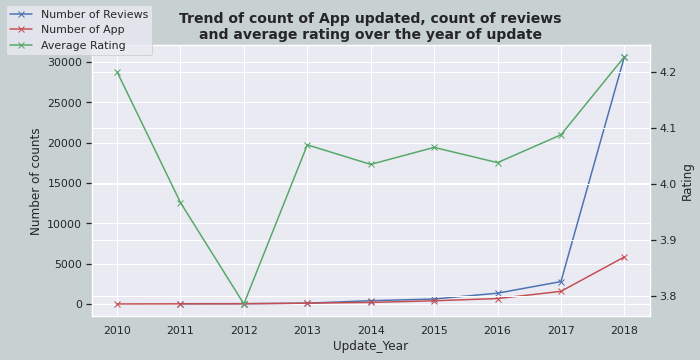

In [ ]:
#Number of written review records
df_Y1=df3.groupby(['Update_Year'], as_index=False).agg({'Translated_Review':'count'})
df_Y1['Category2']='Total_Trans_Review'
df_Y1.rename(columns={'Translated_Review':'Value'}, inplace=True)

#Number of Apps updated in the Year
df_Y2=df1.groupby(['Update_Year'], as_index=False).agg({'App':'count'})
df_Y2['Category2']='App_Count'
df_Y2.rename(columns={'App':'Value'}, inplace=True)

#Number of Apps Average Rating in the Year
df_Y3=df1.groupby(['Update_Year'], as_index=False).agg({'Rating':'mean'})
df_Y3['Category2']='Average_Rating'
df_Y3.rename(columns={'Rating':'Value'}, inplace=True)

# Ploting data
ax = df_Y1.plot('Update_Year', legend=False, figsize=(10, 5), marker='x')
df_Y2.plot(x='Update_Year', ax=ax, legend=False, color="r", marker='x')
ax3 = ax.twinx()
df_Y3.plot(x='Update_Year', ax=ax3, legend=False, color="g", marker='x')
ax.figure.legend(loc='upper left', labels=['Number of Reviews', 'Number of App', 'Average Rating'])

#Labeling
plt.title('Trend of count of App updated, count of reviews\nand average rating over the year of update', fontsize=14, weight='bold')
plt.ylabel('Rating')
ax.set_ylabel('Number of counts')

#### 4. Distribution of review sentiments on app Category.

Result:
1. App category Comics have the heighest positive sentiments in total comments followed by Auto&Vehicles and Event category.
2. Game is the category which have recieved heighest records of negative sentiment for total comments it has recieved, followed by Social and News&Magazines.
3. Category Game has recieved heighsest number of commented reviews. 

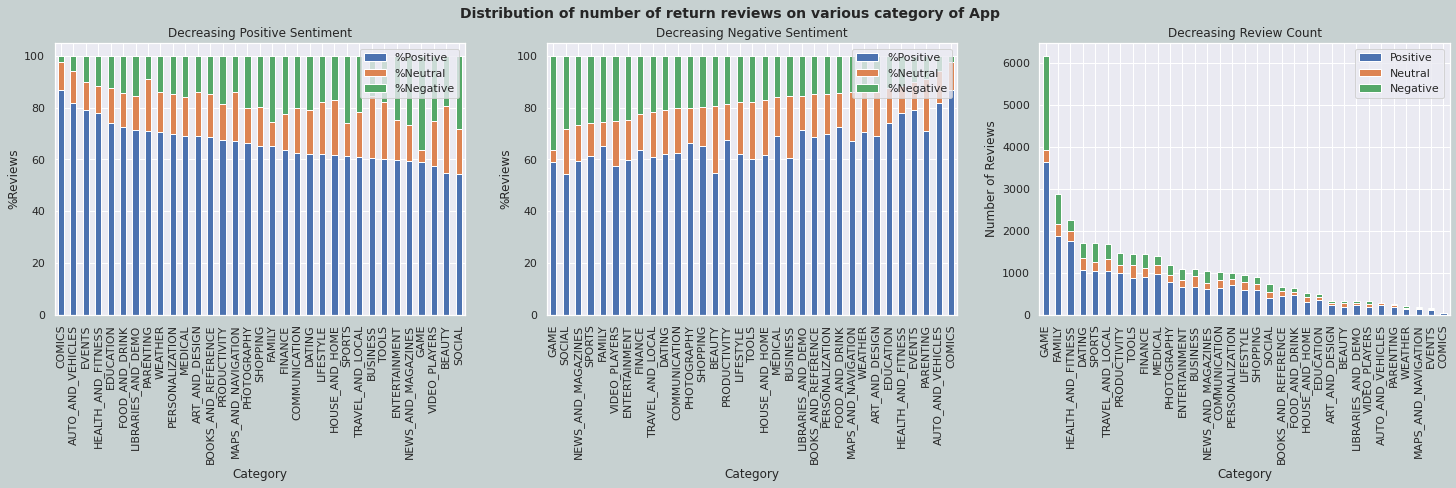

In [ ]:
# Distribution of positive, negative and neutral sentiment on app category
df_review_distribution=df3.groupby(['Category', 'Sentiment']).agg({'Translated_Review':'count'})

df_review_distribution=df_review_distribution.unstack()
df_review_distribution.columns = ['_'.join(col) for col in df_review_distribution.columns.values]

df_review_distribution.rename(columns={'Translated_Review_Negative':'Negative',	'Translated_Review_Neutral':'Neutral',	
                                       'Translated_Review_Positive':'Positive'}, inplace=True)

df_review_distribution.fillna(0, inplace=True)

df_review_distribution['Total_Review']=df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive']

df_review_distribution.sort_values('Total_Review',ascending=False, inplace=True)

df_review_distribution['%Negative']=df_review_distribution['Negative']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100
df_review_distribution['%Neutral']=df_review_distribution['Neutral']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100
df_review_distribution['%Positive']=df_review_distribution['Positive']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100

# Ploting
plt.figure(figsize=(25,5))
ax1 = plt.subplot2grid(shape=(1, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 3), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(1, 3), loc=(0, 2))

df_review_distribution[['%Positive', '%Neutral', '%Negative']].sort_values('%Positive',ascending=False).plot(kind='bar', stacked=True, ax=ax1)
df_review_distribution[['%Positive', '%Neutral', '%Negative']].sort_values('%Negative',ascending=False).plot(kind='bar', stacked=True, ax=ax2)

df_review_distribution[['Positive', 'Neutral', 'Negative']].plot(kind='bar', stacked=True, ax=ax3)

#Labeling
plt.suptitle('Distribution of number of return reviews on various category of App', fontsize=14, weight='bold')

ax1.set_ylabel('%Reviews')
ax2.set_ylabel('%Reviews')
ax3.set_ylabel('Number of Reviews')

ax1.set_title('Decreasing Positive Sentiment')
ax2.set_title('Decreasing Negative Sentiment')
ax3.set_title('Decreasing Review Count')

ax1.legend(loc=1)
ax2.legend(loc=1)
ax3.legend(loc=1)


#### 5. Distribution of review sentiments on app genres.

Result:
1. Health&Fitness genres have recieved most positive response followed by Education.
2. Arcade is the most negative commented genrs followed by Puzzle.
3. Action is the genres who have recieved most number of comments.

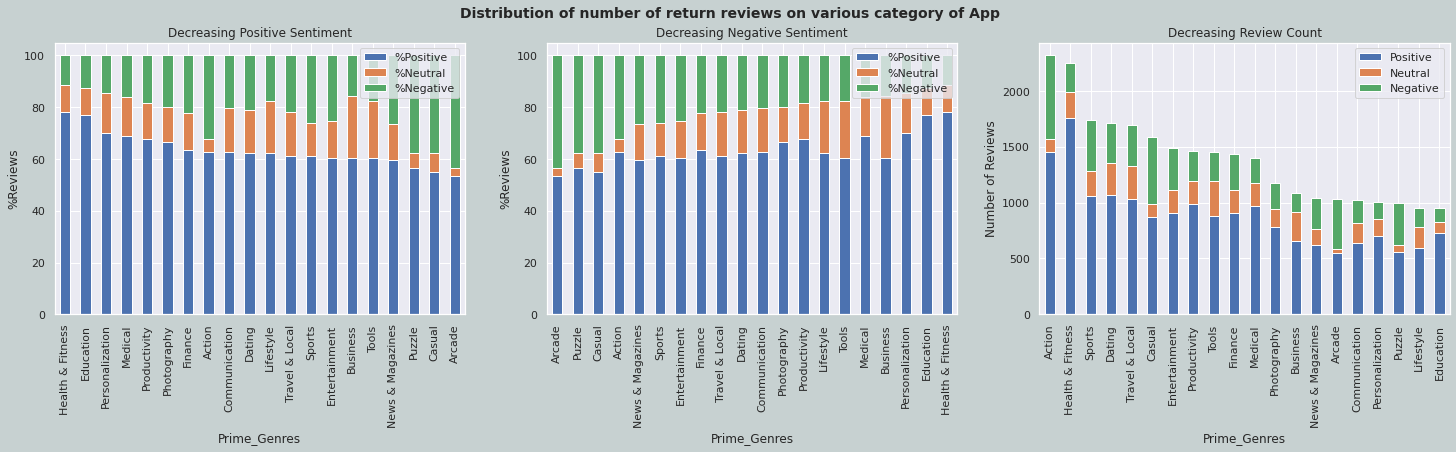

In [ ]:
# Distribution of positive, negative and neutral sentiment on top reveiwed genres
df_review_distribution=df3.groupby(['Prime_Genres', 'Sentiment']).agg({'Translated_Review':'count'})

df_review_distribution=df_review_distribution.unstack()
df_review_distribution.columns = ['_'.join(col) for col in df_review_distribution.columns.values]

df_review_distribution.rename(columns={'Translated_Review_Negative':'Negative',	'Translated_Review_Neutral':'Neutral',	
                                       'Translated_Review_Positive':'Positive'}, inplace=True)

df_review_distribution.fillna(0, inplace=True)

df_review_distribution['Total_Review']=df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive']

df_review_distribution.sort_values('Total_Review',ascending=False, inplace=True)

df_review_distribution=df_review_distribution.head(20)

df_review_distribution['%Negative']=df_review_distribution['Negative']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100
df_review_distribution['%Neutral']=df_review_distribution['Neutral']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100
df_review_distribution['%Positive']=df_review_distribution['Positive']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100

# Ploting
plt.figure(figsize=(25,5))
ax1 = plt.subplot2grid(shape=(1, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 3), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(1, 3), loc=(0, 2))

df_review_distribution[['%Positive', '%Neutral', '%Negative']].sort_values('%Positive',ascending=False).plot(kind='bar', stacked=True, ax=ax1)
df_review_distribution[['%Positive', '%Neutral', '%Negative']].sort_values('%Negative',ascending=False).plot(kind='bar', stacked=True, ax=ax2)

df_review_distribution[['Positive', 'Neutral', 'Negative']].plot(kind='bar', stacked=True, ax=ax3)

#Labeling
plt.suptitle('Distribution of number of return reviews on various category of App', fontsize=14, weight='bold')

ax1.set_ylabel('%Reviews')
ax2.set_ylabel('%Reviews')
ax3.set_ylabel('Number of Reviews')

ax1.set_title('Decreasing Positive Sentiment')
ax2.set_title('Decreasing Negative Sentiment')
ax3.set_title('Decreasing Review Count')

ax1.legend(loc=1)
ax2.legend(loc=1)
ax3.legend(loc=1)

#### 6. Distribution of review sentiments on top 20apps that has got heighest reviews.

Result:
1. Calorie counter- Macros is the app with the heighest share of positive comments followed by 10best foods for you.
2. Candy crush soda saga is the app with heighest neative share of reviews.
3. Bowmaster and Helix jump are the heighest discussed apps.

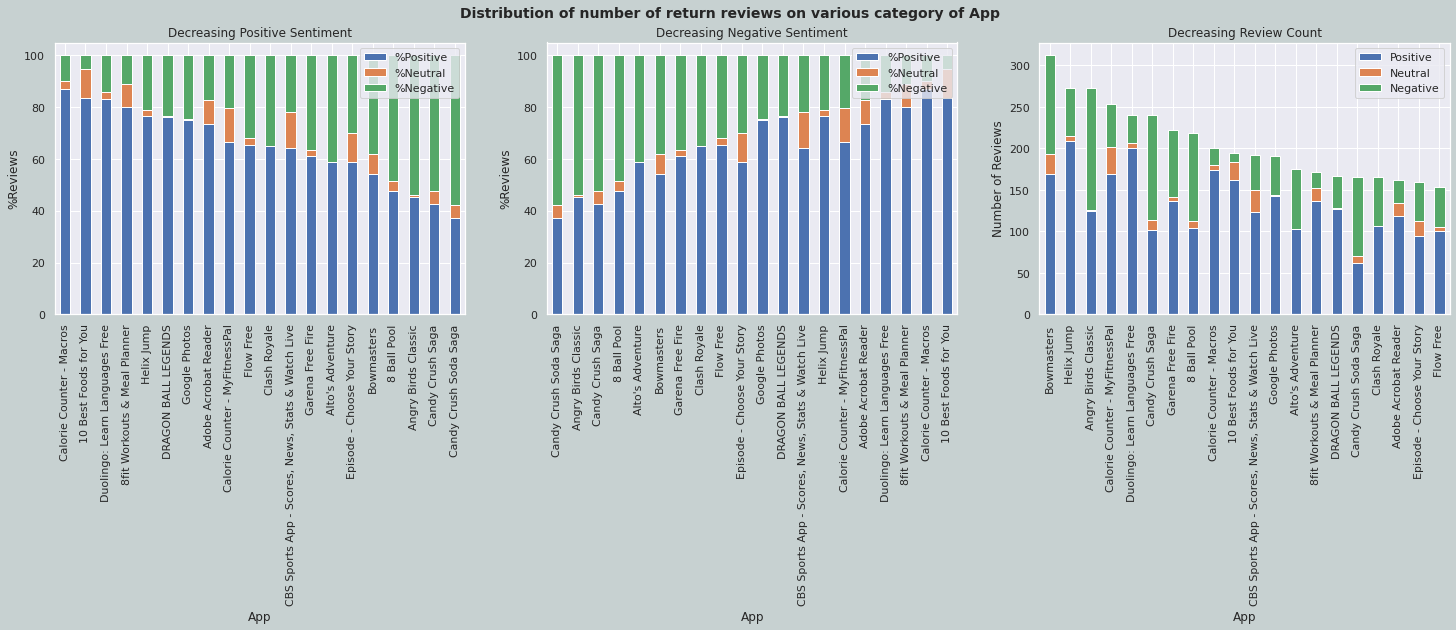

In [ ]:
# Distribution of positive, negative and neutral sentiment on top reveiwed app
df_review_distribution=df3.groupby(['App', 'Sentiment']).agg({'Translated_Review':'count'})

df_review_distribution=df_review_distribution.unstack()
df_review_distribution.columns = ['_'.join(col) for col in df_review_distribution.columns.values]

df_review_distribution.rename(columns={'Translated_Review_Negative':'Negative',	'Translated_Review_Neutral':'Neutral',	
                                       'Translated_Review_Positive':'Positive'}, inplace=True)

df_review_distribution.fillna(0, inplace=True)

df_review_distribution['Total_Review']=df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive']

df_review_distribution.sort_values('Total_Review',ascending=False, inplace=True)

df_review_distribution=df_review_distribution.head(20)

df_review_distribution['%Negative']=df_review_distribution['Negative']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100
df_review_distribution['%Neutral']=df_review_distribution['Neutral']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100
df_review_distribution['%Positive']=df_review_distribution['Positive']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100

# Ploting
plt.figure(figsize=(25,5))
ax1 = plt.subplot2grid(shape=(1, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 3), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(1, 3), loc=(0, 2))

df_review_distribution[['%Positive', '%Neutral', '%Negative']].sort_values('%Positive',ascending=False).plot(kind='bar', stacked=True, ax=ax1)
df_review_distribution[['%Positive', '%Neutral', '%Negative']].sort_values('%Negative',ascending=False).plot(kind='bar', stacked=True, ax=ax2)

df_review_distribution[['Positive', 'Neutral', 'Negative']].plot(kind='bar', stacked=True, ax=ax3)

#Labeling
plt.suptitle('Distribution of number of return reviews on various category of App', fontsize=14, weight='bold')

ax1.set_ylabel('%Reviews')
ax2.set_ylabel('%Reviews')
ax3.set_ylabel('Number of Reviews')

ax1.set_title('Decreasing Positive Sentiment')
ax2.set_title('Decreasing Negative Sentiment')
ax3.set_title('Decreasing Review Count')

ax1.legend(loc=1)
ax2.legend(loc=1)
ax3.legend(loc=1)

#### 1.

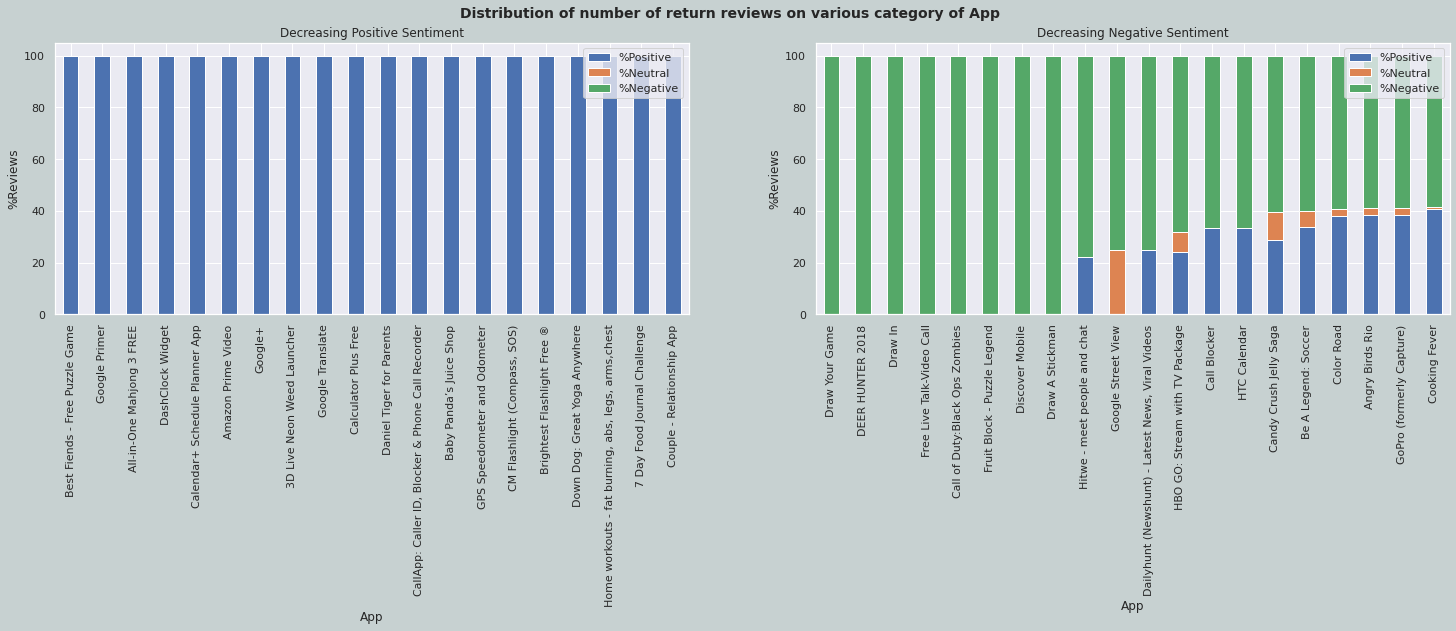

In [ ]:
# Distribution of positive, negative and neutral on top negative and top positive apps in all category
df_review_distribution=df3.groupby(['App', 'Sentiment']).agg({'Translated_Review':'count'})

df_review_distribution=df_review_distribution.unstack()
df_review_distribution.columns = ['_'.join(col) for col in df_review_distribution.columns.values]


df_review_distribution.rename(columns={'Translated_Review_Negative':'Negative',	'Translated_Review_Neutral':'Neutral',	
                                       'Translated_Review_Positive':'Positive'}, inplace=True)

df_review_distribution.fillna(0, inplace=True)
df_review_distribution['Total_Review']=df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive']

df_review_distribution.sort_values('Total_Review',ascending=False, inplace=True)


df_review_distribution['%Negative']=df_review_distribution['Negative']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100
df_review_distribution['%Neutral']=df_review_distribution['Neutral']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100
df_review_distribution['%Positive']=df_review_distribution['Positive']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100

# Ploting
plt.figure(figsize=(25,5))
ax1 = plt.subplot2grid(shape=(1, 2), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 2), loc=(0, 1))

df_review_distribution[['%Positive', '%Neutral', '%Negative']].sort_values('%Positive',ascending=False).head(20).plot(kind='bar', stacked=True, ax=ax1)
df_review_distribution[['%Positive', '%Neutral', '%Negative']].sort_values('%Negative',ascending=False).head(20).plot(kind='bar', stacked=True, ax=ax2)


#Labeling
plt.suptitle('Distribution of number of return reviews on various category of App', fontsize=14, weight='bold')

ax1.set_ylabel('%Reviews')
ax2.set_ylabel('%Reviews')

ax1.set_title('Decreasing Positive Sentiment')
ax2.set_title('Decreasing Negative Sentiment')

ax1.legend(loc=1)
ax2.legend(loc=1)

#### 1.

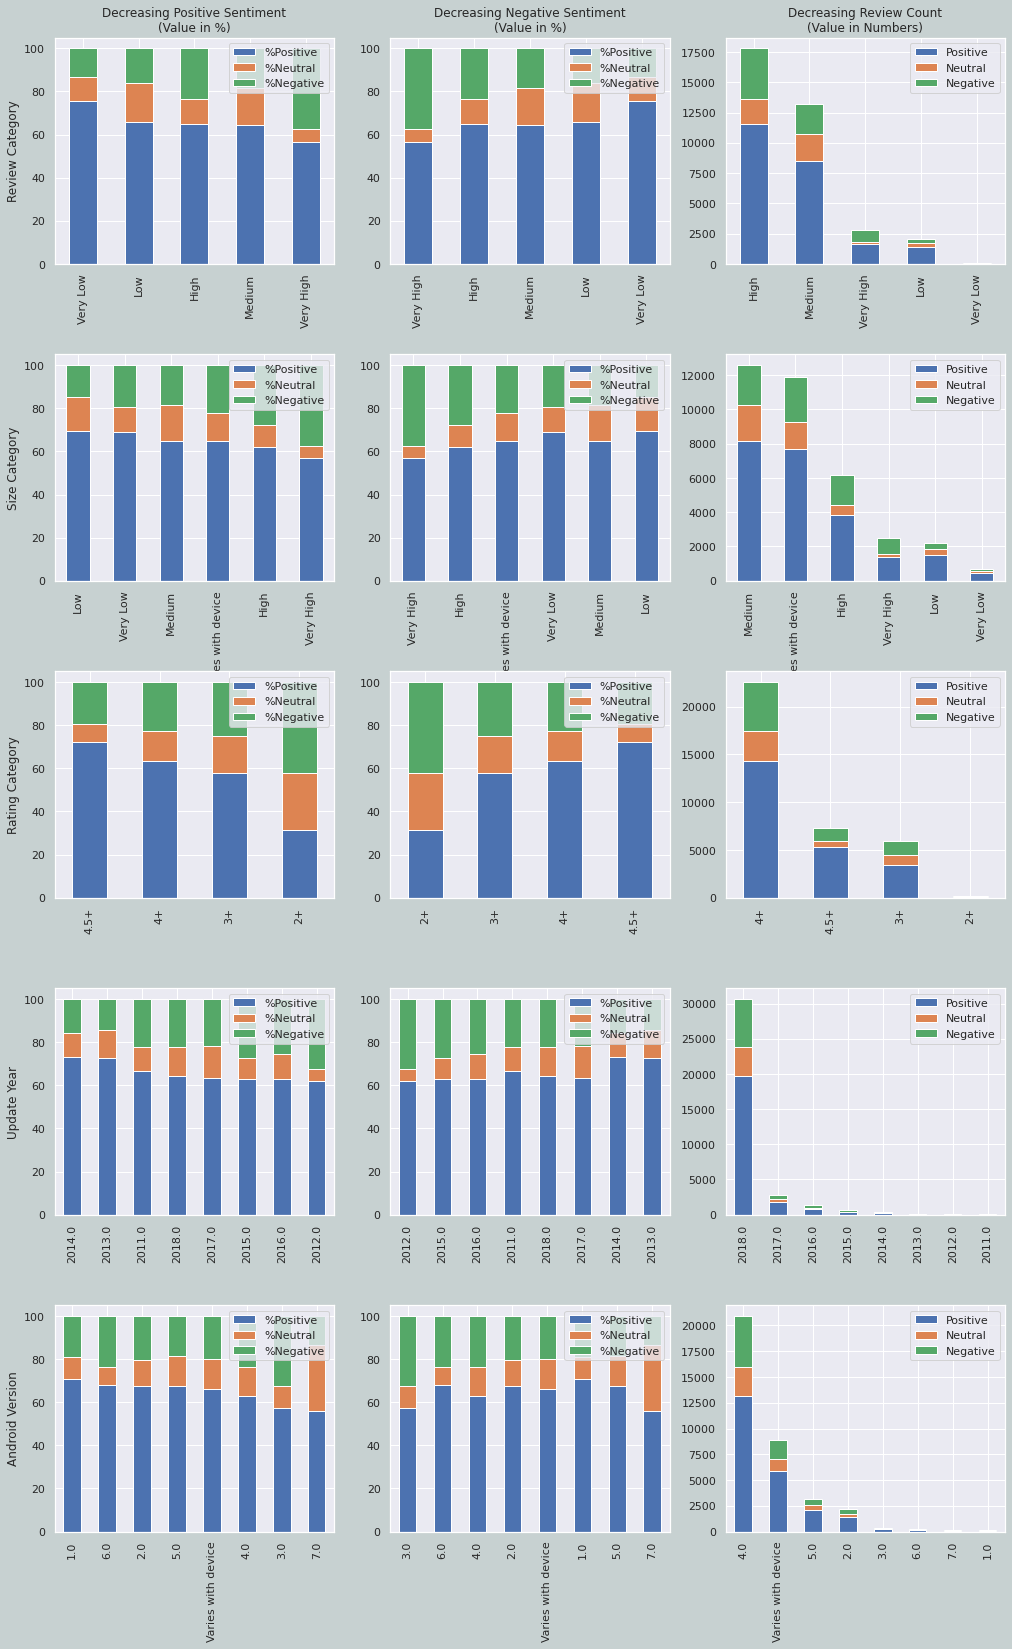

In [ ]:
# Distribution of positive, negative and neutral sentiment on various variable

#Category1: Review Category
df_review_distribution1=df3.groupby(['Review Category', 'Sentiment']).agg({'Translated_Review':'count'})
df_review_distribution1=df_review_distribution1.unstack()
df_review_distribution1.columns = ['_'.join(col) for col in df_review_distribution1.columns.values]
df_review_distribution1.rename(columns={'Translated_Review_Negative':'Negative',	'Translated_Review_Neutral':'Neutral',	
                                       'Translated_Review_Positive':'Positive'}, inplace=True)
df_review_distribution1.fillna(0, inplace=True)
df_review_distribution1['Total_Review']=df_review_distribution1['Negative']+df_review_distribution1['Neutral']+df_review_distribution1['Positive']
df_review_distribution1.sort_values('Total_Review',ascending=False, inplace=True)
df_review_distribution1['%Negative']=df_review_distribution1['Negative']/(df_review_distribution1['Negative']+df_review_distribution1['Neutral']+df_review_distribution1['Positive'])*100
df_review_distribution1['%Neutral']=df_review_distribution1['Neutral']/(df_review_distribution1['Negative']+df_review_distribution1['Neutral']+df_review_distribution1['Positive'])*100
df_review_distribution1['%Positive']=df_review_distribution1['Positive']/(df_review_distribution1['Negative']+df_review_distribution1['Neutral']+df_review_distribution1['Positive'])*100

#Category2: Size Category
df_review_distribution2=df3.groupby(['Size Category', 'Sentiment']).agg({'Translated_Review':'count'})
df_review_distribution2=df_review_distribution2.unstack()
df_review_distribution2.columns = ['_'.join(col) for col in df_review_distribution2.columns.values]
df_review_distribution2.rename(columns={'Translated_Review_Negative':'Negative',	'Translated_Review_Neutral':'Neutral',	
                                       'Translated_Review_Positive':'Positive'}, inplace=True)
df_review_distribution2.fillna(0, inplace=True)
df_review_distribution2['Total_Review']=df_review_distribution2['Negative']+df_review_distribution2['Neutral']+df_review_distribution2['Positive']
df_review_distribution2.sort_values('Total_Review',ascending=False, inplace=True)
df_review_distribution2['%Negative']=df_review_distribution2['Negative']/(df_review_distribution2['Negative']+df_review_distribution2['Neutral']+df_review_distribution2['Positive'])*100
df_review_distribution2['%Neutral']=df_review_distribution2['Neutral']/(df_review_distribution2['Negative']+df_review_distribution2['Neutral']+df_review_distribution2['Positive'])*100
df_review_distribution2['%Positive']=df_review_distribution2['Positive']/(df_review_distribution2['Negative']+df_review_distribution2['Neutral']+df_review_distribution2['Positive'])*100

#Category3: Rating Category
df_review_distribution3=df3.groupby(['Rating Category', 'Sentiment']).agg({'Translated_Review':'count'})
df_review_distribution3=df_review_distribution3.unstack()
df_review_distribution3.columns = ['_'.join(col) for col in df_review_distribution3.columns.values]
df_review_distribution3.rename(columns={'Translated_Review_Negative':'Negative',	'Translated_Review_Neutral':'Neutral',	
                                       'Translated_Review_Positive':'Positive'}, inplace=True)
df_review_distribution3.fillna(0, inplace=True)
df_review_distribution3['Total_Review']=df_review_distribution3['Negative']+df_review_distribution3['Neutral']+df_review_distribution3['Positive']
df_review_distribution3.sort_values('Total_Review',ascending=False, inplace=True)
df_review_distribution3['%Negative']=df_review_distribution3['Negative']/(df_review_distribution3['Negative']+df_review_distribution3['Neutral']+df_review_distribution3['Positive'])*100
df_review_distribution3['%Neutral']=df_review_distribution3['Neutral']/(df_review_distribution3['Negative']+df_review_distribution3['Neutral']+df_review_distribution3['Positive'])*100
df_review_distribution3['%Positive']=df_review_distribution3['Positive']/(df_review_distribution3['Negative']+df_review_distribution3['Neutral']+df_review_distribution3['Positive'])*100

#Category4: Update Year
df_review_distribution4=df3.groupby(['Update_Year', 'Sentiment']).agg({'Translated_Review':'count'})
df_review_distribution4=df_review_distribution4.unstack()
df_review_distribution4.columns = ['_'.join(col) for col in df_review_distribution4.columns.values]
df_review_distribution4.rename(columns={'Translated_Review_Negative':'Negative',	'Translated_Review_Neutral':'Neutral',	
                                       'Translated_Review_Positive':'Positive'}, inplace=True)
df_review_distribution4.fillna(0, inplace=True)
df_review_distribution4['Total_Review']=df_review_distribution4['Negative']+df_review_distribution4['Neutral']+df_review_distribution4['Positive']
df_review_distribution4.sort_values('Total_Review',ascending=False, inplace=True)
df_review_distribution4['%Negative']=df_review_distribution4['Negative']/(df_review_distribution4['Negative']+df_review_distribution4['Neutral']+df_review_distribution4['Positive'])*100
df_review_distribution4['%Neutral']=df_review_distribution4['Neutral']/(df_review_distribution4['Negative']+df_review_distribution4['Neutral']+df_review_distribution4['Positive'])*100
df_review_distribution4['%Positive']=df_review_distribution4['Positive']/(df_review_distribution4['Negative']+df_review_distribution4['Neutral']+df_review_distribution4['Positive'])*100

#Category4: Android Version
df_review_distribution5=df3.groupby(['Android Ver2', 'Sentiment']).agg({'Translated_Review':'count'})
df_review_distribution5=df_review_distribution5.unstack()
df_review_distribution5.columns = ['_'.join(col) for col in df_review_distribution5.columns.values]
df_review_distribution5.rename(columns={'Translated_Review_Negative':'Negative',	'Translated_Review_Neutral':'Neutral',	
                                       'Translated_Review_Positive':'Positive'}, inplace=True)
df_review_distribution5.fillna(0, inplace=True)
df_review_distribution5['Total_Review']=df_review_distribution5['Negative']+df_review_distribution5['Neutral']+df_review_distribution5['Positive']
df_review_distribution5.sort_values('Total_Review',ascending=False, inplace=True)
df_review_distribution5['%Negative']=df_review_distribution5['Negative']/(df_review_distribution5['Negative']+df_review_distribution5['Neutral']+df_review_distribution5['Positive'])*100
df_review_distribution5['%Neutral']=df_review_distribution5['Neutral']/(df_review_distribution5['Negative']+df_review_distribution5['Neutral']+df_review_distribution5['Positive'])*100
df_review_distribution5['%Positive']=df_review_distribution5['Positive']/(df_review_distribution5['Negative']+df_review_distribution5['Neutral']+df_review_distribution5['Positive'])*100



# Subplot
plt.figure(figsize=(15,25))
ax1 = plt.subplot2grid(shape=(5, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(5, 3), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(5, 3), loc=(0, 2))
ax4 = plt.subplot2grid(shape=(5, 3), loc=(1, 0))
ax5 = plt.subplot2grid(shape=(5, 3), loc=(1, 1))
ax6 = plt.subplot2grid(shape=(5, 3), loc=(1, 2))
ax7 = plt.subplot2grid(shape=(5, 3), loc=(2, 0))
ax8 = plt.subplot2grid(shape=(5, 3), loc=(2, 1))
ax9 = plt.subplot2grid(shape=(5, 3), loc=(2, 2))
ax10 = plt.subplot2grid(shape=(5, 3), loc=(3, 0))
ax11 = plt.subplot2grid(shape=(5, 3), loc=(3, 1))
ax12 = plt.subplot2grid(shape=(5, 3), loc=(3, 2))
ax13 = plt.subplot2grid(shape=(5, 3), loc=(4, 0))
ax14 = plt.subplot2grid(shape=(5, 3), loc=(4, 1))
ax15 = plt.subplot2grid(shape=(5, 3), loc=(4, 2))


# Ploting1
df_review_distribution1[['%Positive', '%Neutral', '%Negative']].sort_values('%Positive',ascending=False).plot(kind='bar', stacked=True, ax=ax1)
df_review_distribution1[['%Positive', '%Neutral', '%Negative']].sort_values('%Negative',ascending=False).plot(kind='bar', stacked=True, ax=ax2)
df_review_distribution1[['Positive', 'Neutral', 'Negative']].plot(kind='bar', stacked=True, ax=ax3)

# Ploting2
df_review_distribution2[['%Positive', '%Neutral', '%Negative']].sort_values('%Positive',ascending=False).plot(kind='bar', stacked=True, ax=ax4)
df_review_distribution2[['%Positive', '%Neutral', '%Negative']].sort_values('%Negative',ascending=False).plot(kind='bar', stacked=True, ax=ax5)
df_review_distribution2[['Positive', 'Neutral', 'Negative']].plot(kind='bar', stacked=True, ax=ax6)

# Ploting3
df_review_distribution3[['%Positive', '%Neutral', '%Negative']].sort_values('%Positive',ascending=False).plot(kind='bar', stacked=True, ax=ax7)
df_review_distribution3[['%Positive', '%Neutral', '%Negative']].sort_values('%Negative',ascending=False).plot(kind='bar', stacked=True, ax=ax8)
df_review_distribution3[['Positive', 'Neutral', 'Negative']].plot(kind='bar', stacked=True, ax=ax9)

# Ploting4
df_review_distribution4[['%Positive', '%Neutral', '%Negative']].sort_values('%Positive',ascending=False).plot(kind='bar', stacked=True, ax=ax10)
df_review_distribution4[['%Positive', '%Neutral', '%Negative']].sort_values('%Negative',ascending=False).plot(kind='bar', stacked=True, ax=ax11)
df_review_distribution4[['Positive', 'Neutral', 'Negative']].plot(kind='bar', stacked=True, ax=ax12)

# Ploting5
df_review_distribution5[['%Positive', '%Neutral', '%Negative']].sort_values('%Positive',ascending=False).plot(kind='bar', stacked=True, ax=ax13)
df_review_distribution5[['%Positive', '%Neutral', '%Negative']].sort_values('%Negative',ascending=False).plot(kind='bar', stacked=True, ax=ax14)
df_review_distribution5[['Positive', 'Neutral', 'Negative']].plot(kind='bar', stacked=True, ax=ax15)

# To adjust subplot properties
plt.subplots_adjust(left=0.02,
                    bottom=0.1,
                    right=0.9,
                    top=0.93,
                    wspace=.2,
                    hspace=.4)

#Labeling
ax1.set_ylabel('Review Category')
ax4.set_ylabel('Size Category')
ax7.set_ylabel('Rating Category')
ax10.set_ylabel('Update Year')
ax13.set_ylabel('Android Version')

ax1.set_title('Decreasing Positive Sentiment\n(Value in %)')
ax2.set_title('Decreasing Negative Sentiment\n(Value in %)')
ax3.set_title('Decreasing Review Count\n(Value in Numbers)')

'''Muting x label'''
g=range(1,16)
for x in g:
  exec('ax{}.set(xlabel=None)'.format(x))
  exec("ax{}.legend(loc=1)".format(x))

#### 1.

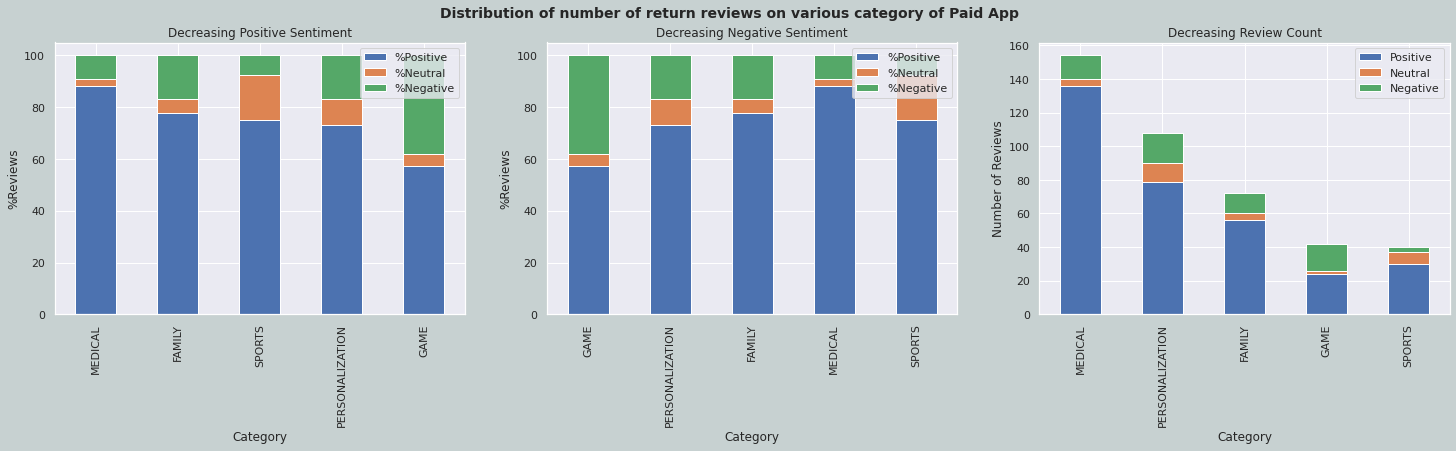

In [ ]:
# Distribution of positive, negative and neutral sentiment on Paid Apps
df_review_distribution=df3[df3['Type']=='Paid'].groupby(['Category', 'Sentiment']).agg({'Translated_Review':'count'})

df_review_distribution=df_review_distribution.unstack()
df_review_distribution.columns = ['_'.join(col) for col in df_review_distribution.columns.values]
df_review_distribution.fillna(0, inplace=True)
df_review_distribution.rename(columns={'Translated_Review_Negative':'Negative',	'Translated_Review_Neutral':'Neutral',	
                                       'Translated_Review_Positive':'Positive'}, inplace=True)

df_review_distribution['Total_Review']=df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive']

df_review_distribution.sort_values('Total_Review',ascending=False, inplace=True)

df_review_distribution['%Negative']=df_review_distribution['Negative']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100
df_review_distribution['%Neutral']=df_review_distribution['Neutral']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100
df_review_distribution['%Positive']=df_review_distribution['Positive']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100

# Ploting
plt.figure(figsize=(25,5))
ax1 = plt.subplot2grid(shape=(1, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 3), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(1, 3), loc=(0, 2))

df_review_distribution[['%Positive', '%Neutral', '%Negative']].sort_values('%Positive',ascending=False).plot(kind='bar', stacked=True, ax=ax1)
df_review_distribution[['%Positive', '%Neutral', '%Negative']].sort_values('%Negative',ascending=False).plot(kind='bar', stacked=True, ax=ax2)

df_review_distribution[['Positive', 'Neutral', 'Negative']].plot(kind='bar', stacked=True, ax=ax3)

#Labeling
plt.suptitle('Distribution of number of return reviews on various category of Paid App', fontsize=14, weight='bold')

ax1.set_ylabel('%Reviews')
ax2.set_ylabel('%Reviews')
ax3.set_ylabel('Number of Reviews')

ax1.set_title('Decreasing Positive Sentiment')
ax2.set_title('Decreasing Negative Sentiment')
ax3.set_title('Decreasing Review Count')

ax1.legend(loc=1)
ax2.legend(loc=1)
ax3.legend(loc=1)

#### 1.

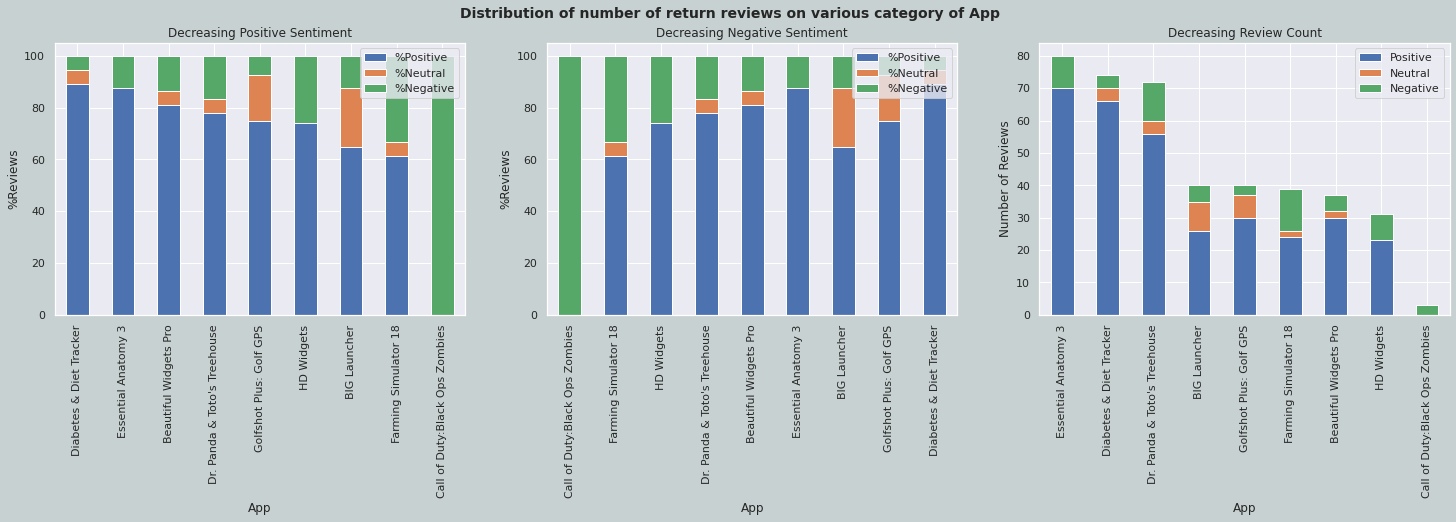

In [ ]:
# Distribution of positive, negative and neutral sentiment on top reveiwed Paid app
df_review_distribution=df3[df3['Type']=='Paid'].groupby(['App', 'Sentiment']).agg({'Translated_Review':'count'})


df_review_distribution=df_review_distribution.unstack()
df_review_distribution.columns = ['_'.join(col) for col in df_review_distribution.columns.values]
df_review_distribution.fillna(0, inplace=True)
df_review_distribution.rename(columns={'Translated_Review_Negative':'Negative',	'Translated_Review_Neutral':'Neutral',	
                                       'Translated_Review_Positive':'Positive'}, inplace=True)

df_review_distribution['Total_Review']=df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive']

df_review_distribution.sort_values('Total_Review',ascending=False, inplace=True)

df_review_distribution=df_review_distribution.head(20)

df_review_distribution['%Negative']=df_review_distribution['Negative']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100
df_review_distribution['%Neutral']=df_review_distribution['Neutral']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100
df_review_distribution['%Positive']=df_review_distribution['Positive']/(df_review_distribution['Negative']+df_review_distribution['Neutral']+df_review_distribution['Positive'])*100

# Ploting
plt.figure(figsize=(25,5))
ax1 = plt.subplot2grid(shape=(1, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 3), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(1, 3), loc=(0, 2))

df_review_distribution[['%Positive', '%Neutral', '%Negative']].sort_values('%Positive',ascending=False).plot(kind='bar', stacked=True, ax=ax1)
df_review_distribution[['%Positive', '%Neutral', '%Negative']].sort_values('%Negative',ascending=False).plot(kind='bar', stacked=True, ax=ax2)

df_review_distribution[['Positive', 'Neutral', 'Negative']].plot(kind='bar', stacked=True, ax=ax3)

#Labeling
plt.suptitle('Distribution of number of return reviews on various category of App', fontsize=14, weight='bold')

ax1.set_ylabel('%Reviews')
ax2.set_ylabel('%Reviews')
ax3.set_ylabel('Number of Reviews')

ax1.set_title('Decreasing Positive Sentiment')
ax2.set_title('Decreasing Negative Sentiment')
ax3.set_title('Decreasing Review Count')

ax1.legend(loc=1)
ax2.legend(loc=1)
ax3.legend(loc=1)

## 5. ***Solution to Business Objective***

## 6. ***Conclusion***

In [ ]:
# Final Conclusions